In [52]:
# loading the important libraries 

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [53]:
# read the dataset 
pd.set_option("display.max_columns", None)

df = pd.read_csv('heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [56]:
for cols in df.columns:
    unique_vals = df[cols].unique()
    if len(unique_vals) <= 10:
        print("Feature ", cols, " has ", len(unique_vals), " unique values ----> ", unique_vals)
    else:
        print("Feature ", cols, " has ", len(unique_vals), " unique values")

Feature  age  has  41  unique values
Feature  sex  has  2  unique values ---->  [1 0]
Feature  cp  has  4  unique values ---->  [3 2 1 0]
Feature  trestbps  has  49  unique values
Feature  chol  has  152  unique values
Feature  fbs  has  2  unique values ---->  [1 0]
Feature  restecg  has  3  unique values ---->  [0 1 2]
Feature  thalach  has  91  unique values
Feature  exang  has  2  unique values ---->  [0 1]
Feature  oldpeak  has  40  unique values
Feature  slope  has  3  unique values ---->  [0 2 1]
Feature  ca  has  5  unique values ---->  [0 2 1 3 4]
Feature  thal  has  4  unique values ---->  [1 2 3 0]
Feature  target  has  2  unique values ---->  [1 0]


# Data Pre-processing Phase

# EDA 

In [57]:
## checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [58]:
# remove duplicate entries, if any
df.drop_duplicates(inplace = True)
print(df.shape)

(302, 14)


In [59]:
for colum in df.columns:
    
        print("Feature ", colum)
    
        print("value count ", df[colum].value_counts())

Feature  age
value count  58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
71     3
37     2
38     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64
Feature  sex
value count  1    206
0     96
Name: sex, dtype: int64
Feature  cp
value count  0    143
2     86
1     50
3     23
Name: cp, dtype: int64
Feature  trestbps
value count  120    37
130    36
140    32
110    19
150    17
128    12
138    12
125    11
160    11
112     9
132     8
118     7
108     6
135     6
124     6
152     5
145     5
134     5
100     4
122     4
170     4
126     3
115     3
105     3
136     3
180     3
142     3
146     2
148     2
178     2
94      2
144     2
102     2
129     1
192     1
101     1
174     1
172     1
104     1
165     

Feature  sex


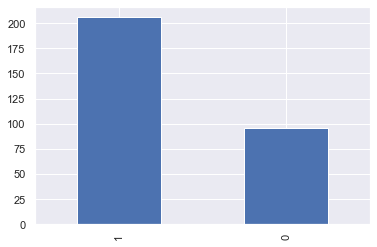

Feature  cp


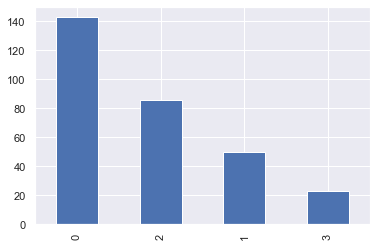

Feature  fbs


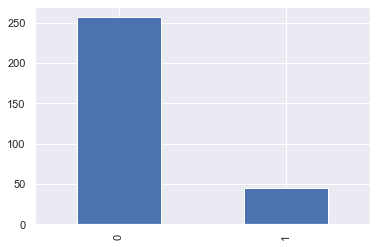

Feature  restecg


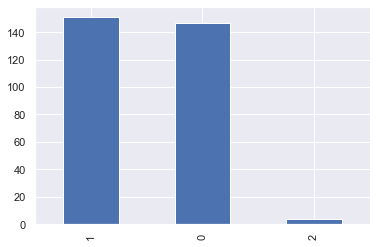

Feature  exang


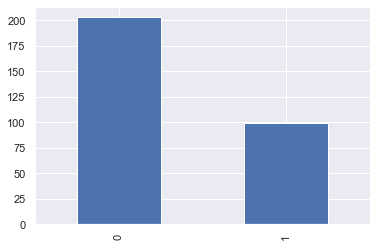

Feature  slope


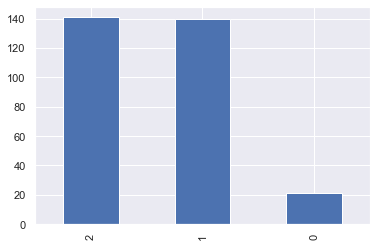

Feature  ca


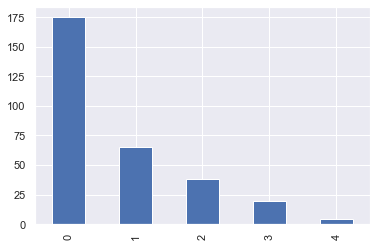

Feature  thal


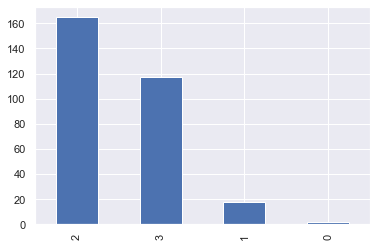

Feature  target


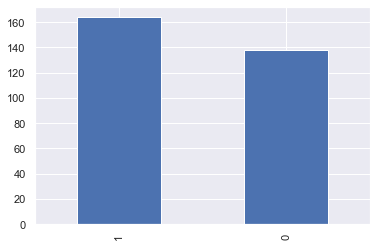

In [60]:
for colm in df.columns:
       if len(df[colm].unique()) <= 30:
            
          print("Feature ", colm)
          df[colm].value_counts().plot(kind="bar")
          plt.show()

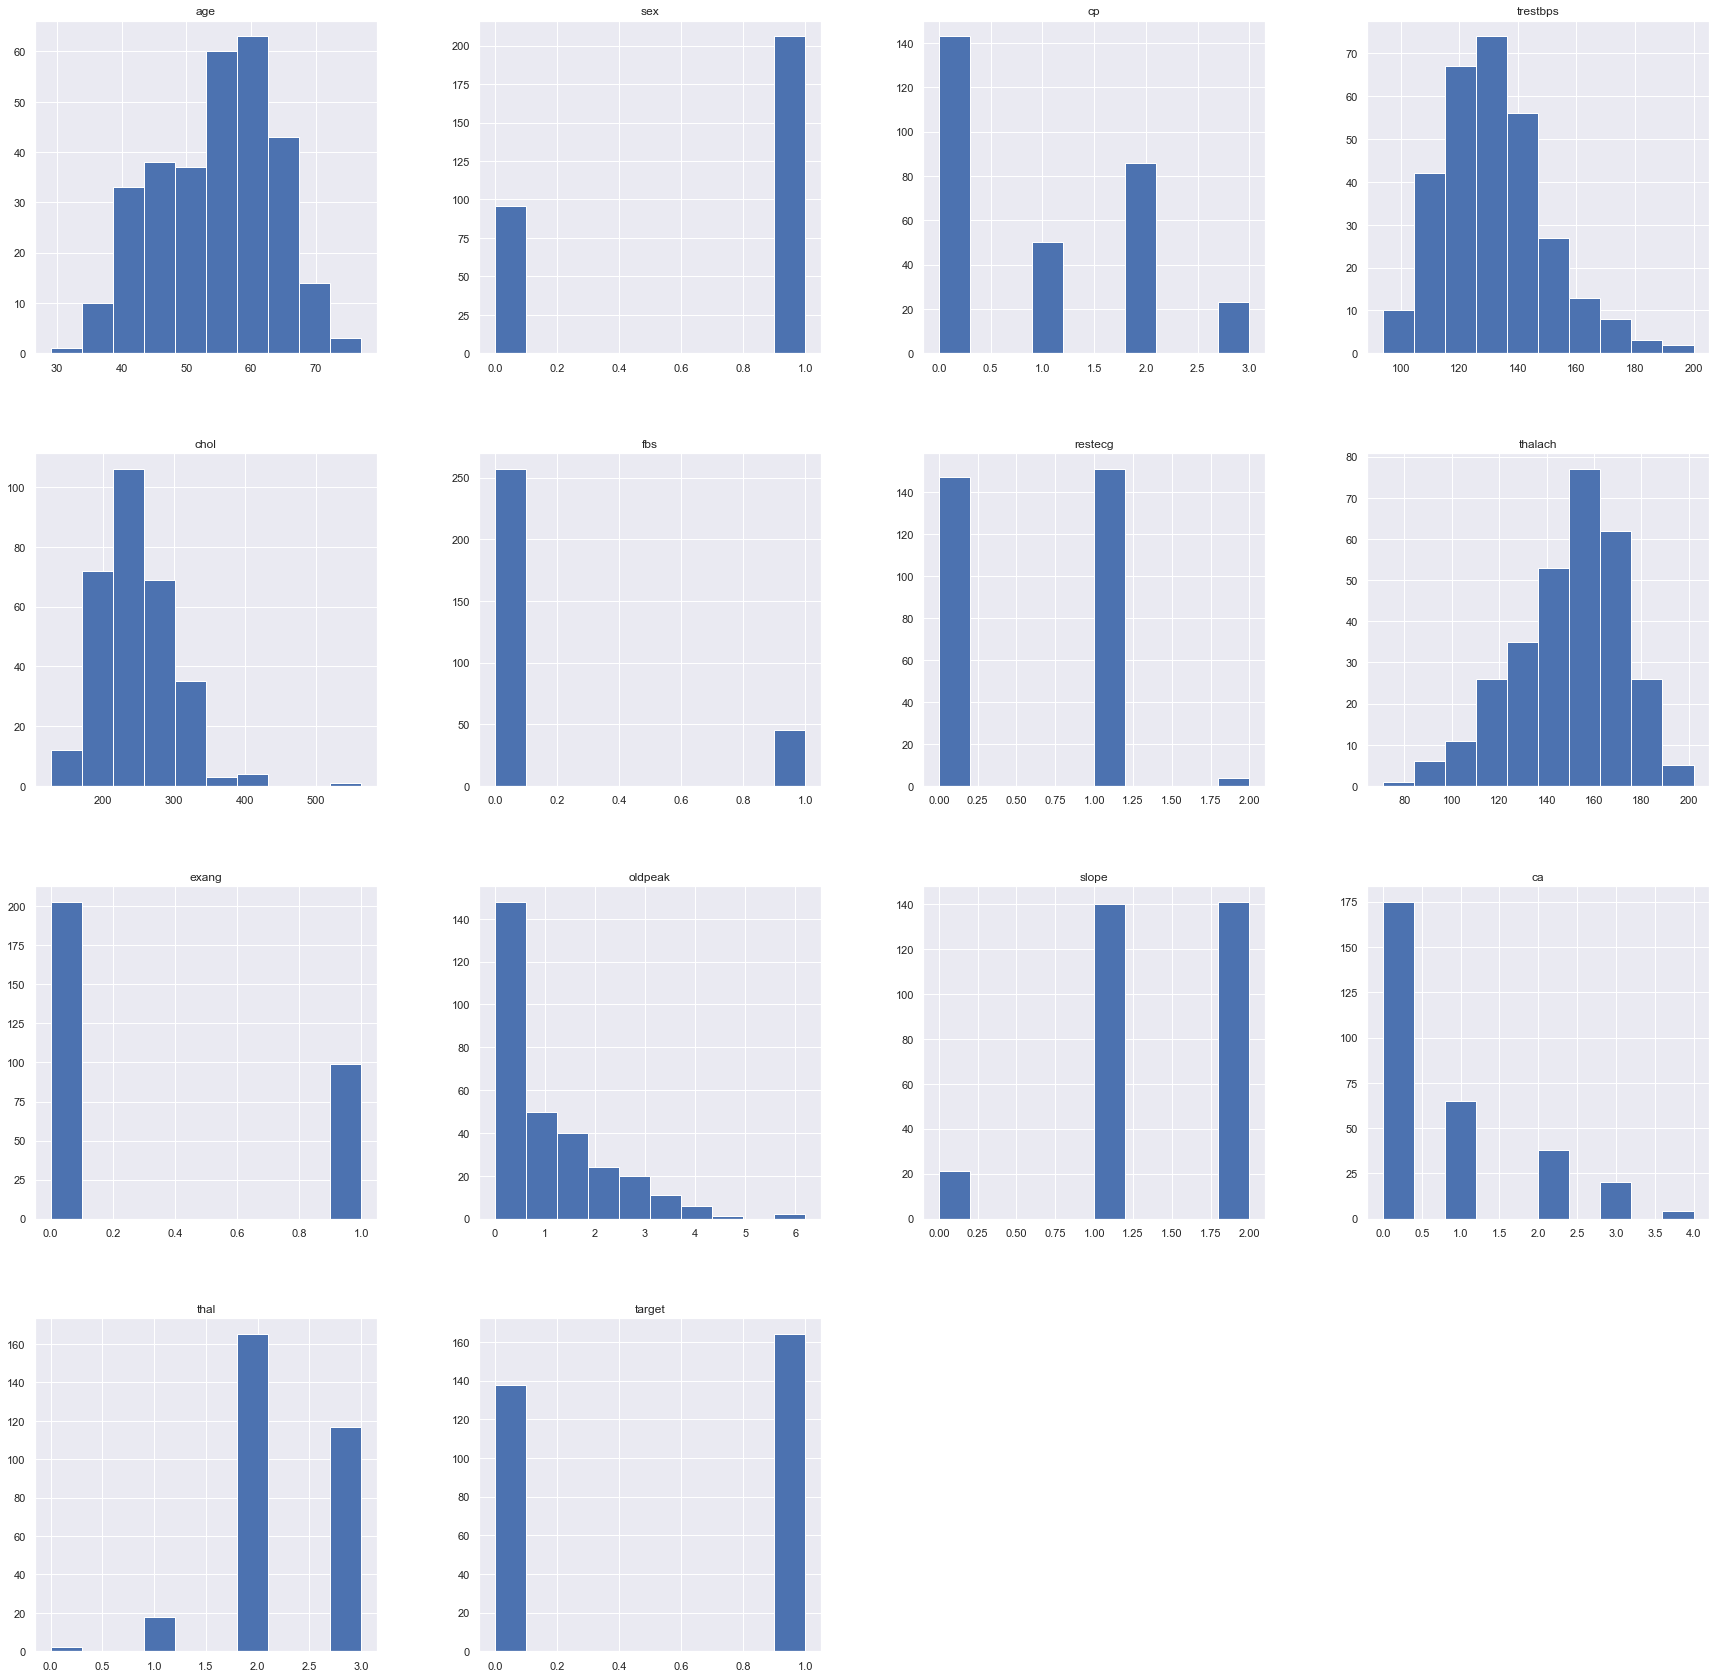

In [61]:
df.hist(figsize=(30,30))
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

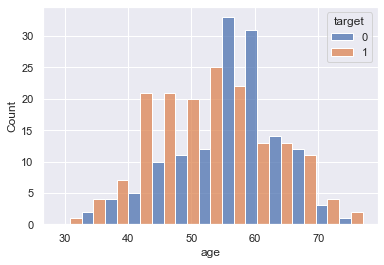

In [62]:
sns.histplot(x = 'age', data = df, hue = 'target',multiple = 'dodge')

In [ ]:
#feature age has no variation both categories

<AxesSubplot:xlabel='sex', ylabel='Count'>

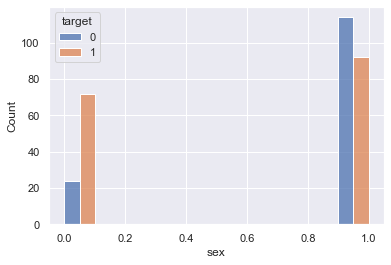

In [63]:
sns.histplot(x = 'sex', data = df, hue = 'target',multiple = 'dodge')

In [ ]:
#Male have more chance of having heart disease

<AxesSubplot:xlabel='cp', ylabel='Count'>

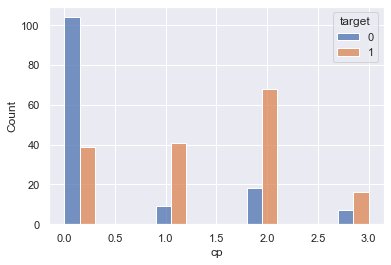

In [64]:

sns.histplot(x = 'cp', data = df, hue = 'target',multiple = 'dodge')

In [ ]:
#people with type 2 chest pain have more chance of having heart disease

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

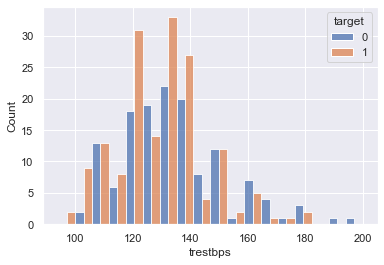

In [65]:
sns.histplot(x = 'trestbps', data = df, hue = 'target',multiple = 'dodge')

In [ ]:
#feature trestbps has no variation in both categories

<AxesSubplot:xlabel='chol', ylabel='Count'>

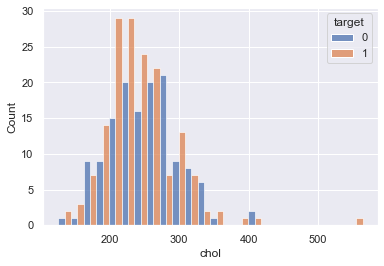

In [66]:
sns.histplot(x = 'chol', data = df, hue = 'target',multiple = 'dodge')

In [ ]:
#feature chol has no variation in both categories

<AxesSubplot:xlabel='fbs', ylabel='Count'>

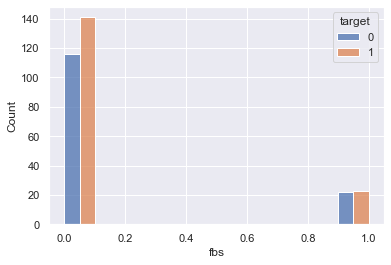

In [67]:
sns.histplot(x = 'fbs', data = df, hue = 'target',multiple = 'dodge')

In [ ]:
#people with no fbs have more chance of having heart disease

<AxesSubplot:xlabel='restecg', ylabel='Count'>

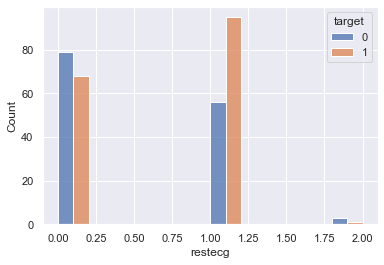

In [68]:
sns.histplot(x = 'restecg', data = df, hue = 'target',multiple = 'dodge')

In [ ]:
#people with restecg have more chance of having heart disease

<AxesSubplot:xlabel='thalach', ylabel='Count'>

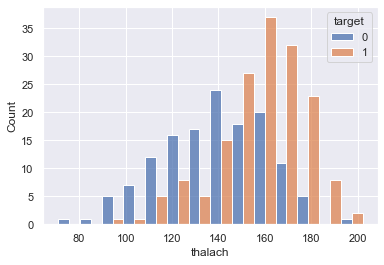

In [69]:
sns.histplot(x = 'thalach', data = df, hue = 'target',multiple = 'dodge')

In [ ]:
#people with a thalach over 150 have more chance of having heart disease

<AxesSubplot:xlabel='exang', ylabel='Count'>

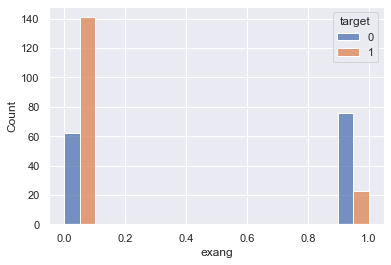

In [70]:
sns.histplot(x = 'exang', data = df, hue = 'target',multiple = 'dodge')

In [ ]:
#people with no exang have more chance of having heart disease

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

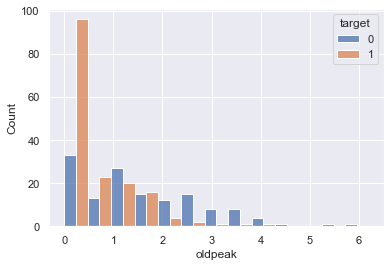

In [71]:
sns.histplot(x = 'oldpeak', data = df, hue = 'target',multiple = 'dodge')

In [ ]:
#people with no oldpeak have more chance of having heart disease

<AxesSubplot:xlabel='slope', ylabel='Count'>

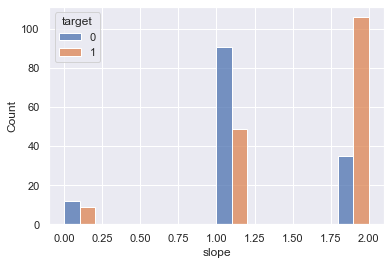

In [72]:
sns.histplot(x = 'slope', data = df, hue = 'target',multiple = 'dodge')

In [ ]:
#people with type 2 slope have more chance of having heart disease

<AxesSubplot:xlabel='ca', ylabel='Count'>

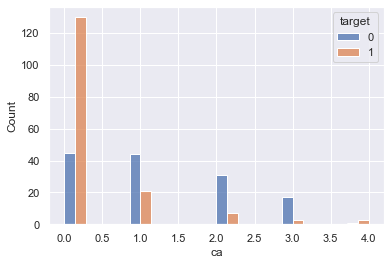

In [73]:
sns.histplot(x = 'ca', data = df, hue = 'target',multiple = 'dodge')

In [ ]:
#people with no ca have more chance of having heart disease

<AxesSubplot:xlabel='thal', ylabel='Count'>

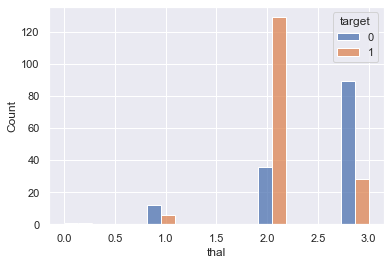

In [74]:
sns.histplot(x = 'thal', data = df, hue = 'target',multiple = 'dodge')

In [ ]:
#people with type 2 thal have more chance of having heart disease

<AxesSubplot:xlabel='age', ylabel='target'>

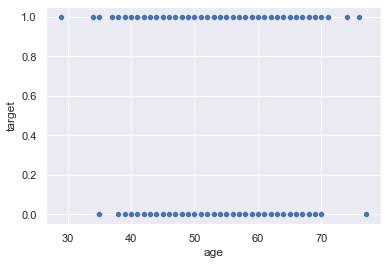

In [75]:
sns.scatterplot(df['age'],df['target'])

In [ ]:
#feature age has no variations in both categories

<AxesSubplot:xlabel='trestbps', ylabel='target'>

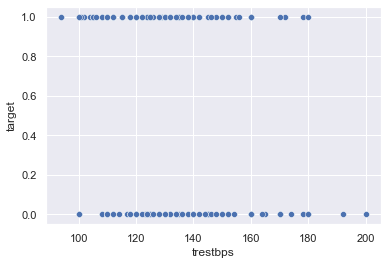

In [76]:
sns.scatterplot(df['trestbps'],df['target'])

In [ ]:
#feature trestbps has no variations in both categories

<AxesSubplot:xlabel='chol', ylabel='target'>

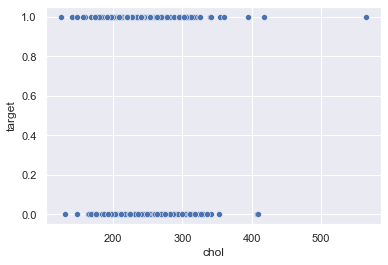

In [77]:
sns.scatterplot(df['chol'],df['target'])

In [ ]:
#feature chol after value 350 have less chance of having heart disease

<AxesSubplot:xlabel='thalach', ylabel='target'>

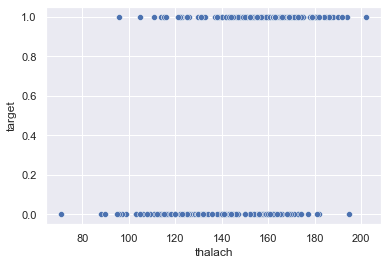

In [78]:
sns.scatterplot(df['thalach'],df['target'])

In [ ]:
#feature thalach before 100 have less chance of having heart disease

<AxesSubplot:xlabel='oldpeak', ylabel='target'>

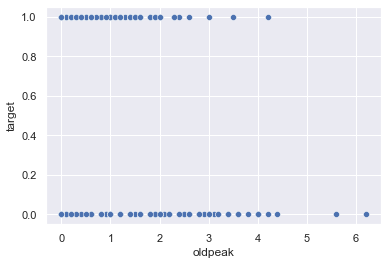

In [79]:
sns.scatterplot(df['oldpeak'],df['target'])

In [ ]:
#feature oldpeak after value 2.5 have less chance of having heart disease

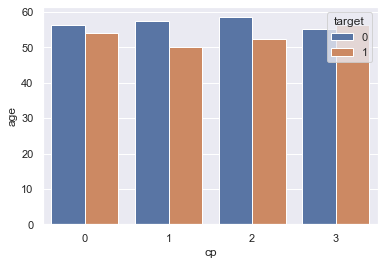

In [80]:
sns.barplot( x=df['cp'], y=df['age'], hue=df['target'],ci=None )
plt.show()

In [ ]:
#feature age with chest pain type 3 have more chance of having stroke 

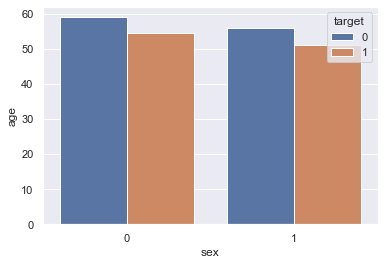

In [81]:
sns.barplot( x=df['sex'], y=df['age'], hue=df['target'],ci=None )
plt.show()

In [ ]:
#feature age with sex have no variation in both categories

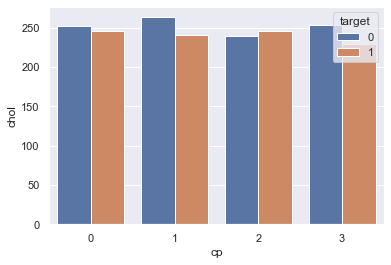

In [82]:
sns.barplot( x=df['cp'], y=df['chol'], hue=df['target'],ci=None )
plt.show()

In [ ]:
#feature chol with chest pain type 2 have more chance of having stroke

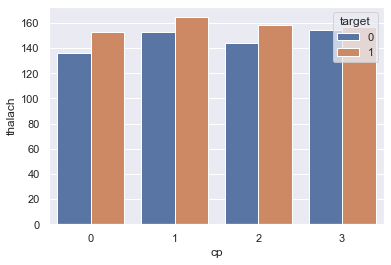

In [83]:
sns.barplot( x=df['cp'], y=df['thalach'], hue=df['target'],ci=None )
plt.show()

In [ ]:
#feature thalach with cp have no variation in both categories

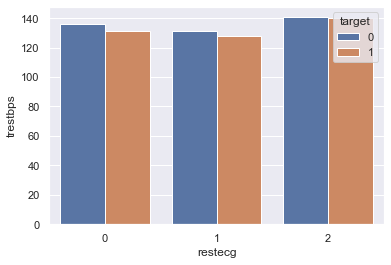

In [84]:
sns.barplot( x=df['restecg'], y=df['trestbps'], hue=df['target'],ci=None )
plt.show()

In [ ]:
#feature trestbps with restecg have no variation in both categories

#Checking outliers

In [85]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


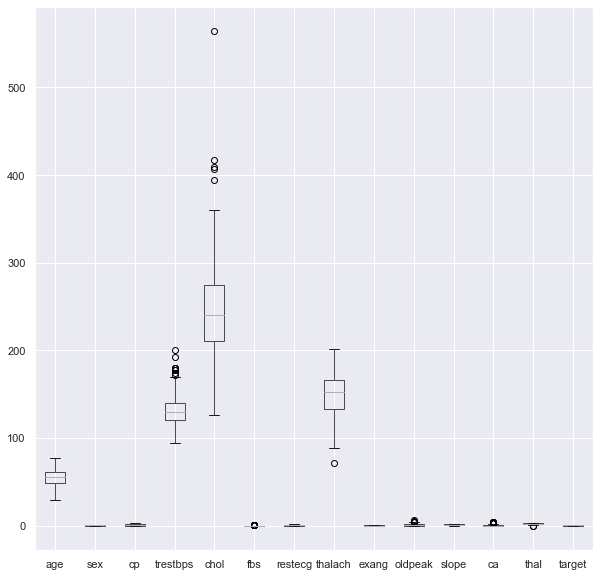

In [86]:
df.boxplot(figsize=(10,10))
plt.show()

In [87]:
# implementation of the Tukey's algorithm
def findOutliers(dataset):
    outliers = []
    Q2 = dataset.median()
    Q1 = dataset.describe()[4]
    Q3 = dataset.describe()[6]
    IQR = Q3 - Q1
    lf = Q1 - 1.5*IQR # lf = lower fence
    uf = Q3 + 1.5*IQR # Uf = Upper fence
    for x in dataset:
        if x < lf or x > uf:
            outliers.append(x)
    return outliers

In [88]:
findOutliers(df['age'])

[]

<AxesSubplot:xlabel='age'>

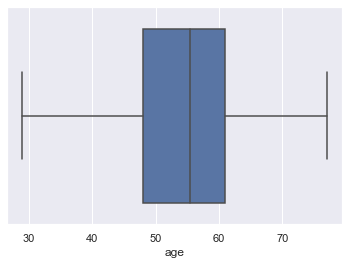

In [89]:
sns.boxplot(x = 'age', data = df)

In [90]:
findOutliers(df['chol'])

[417, 564, 394, 407, 409]

<AxesSubplot:xlabel='chol'>

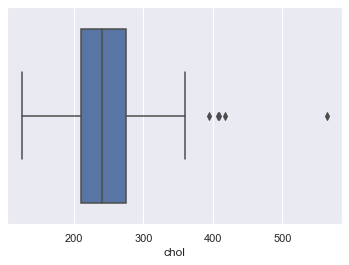

In [91]:
sns.boxplot(x = 'chol', data = df)

In [92]:
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['chol']=np.where(df['chol']>upper_whisker,upper_whisker,np.where(df['chol']<lower_whisker,lower_whisker,df['chol']))

<AxesSubplot:xlabel='chol'>

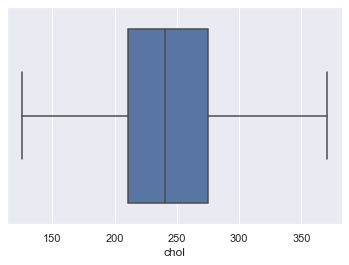

In [95]:
sns.boxplot(x = 'chol', data = df)

In [96]:
findOutliers(df['thalach'])

[71]

<AxesSubplot:xlabel='thalach'>

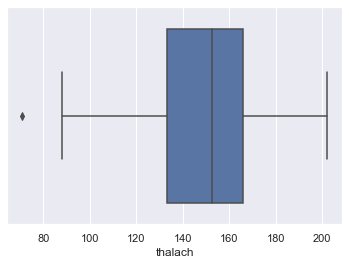

In [97]:
sns.boxplot(x = 'thalach', data = df)

In [98]:
Q1 = df['thalach'].quantile(0.25)
Q3 = df['thalach'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['thalach']=np.where(df['thalach']>upper_whisker,upper_whisker,np.where(df['thalach']<lower_whisker,
                                                                          lower_whisker,df['thalach']))

<AxesSubplot:xlabel='thalach'>

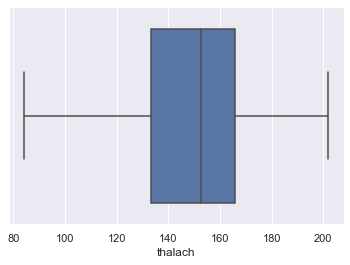

In [99]:
sns.boxplot(x = 'thalach', data = df)

In [100]:
findOutliers(df['oldpeak'])

[4.2, 6.2, 5.6, 4.2, 4.4]

<AxesSubplot:xlabel='oldpeak'>

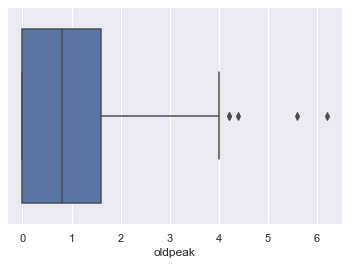

In [101]:
sns.boxplot(x = 'oldpeak', data = df)

In [102]:
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['oldpeak']=np.where(df['oldpeak']>upper_whisker,upper_whisker,np.where(df['oldpeak']<lower_whisker,
                                                                          lower_whisker,df['oldpeak']))

<AxesSubplot:xlabel='oldpeak'>

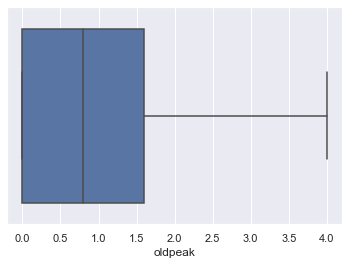

In [103]:
sns.boxplot(x = 'oldpeak', data = df)

In [104]:
findOutliers(df['trestbps'])

[172, 178, 180, 180, 200, 174, 192, 178, 180]

<AxesSubplot:xlabel='trestbps'>

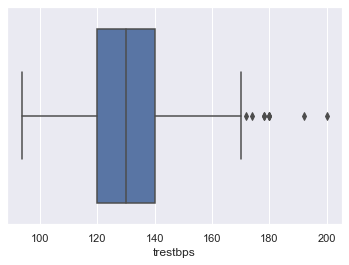

In [105]:
sns.boxplot(x = 'trestbps', data = df)

In [106]:
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['trestbps']=np.where(df['trestbps']>upper_whisker,upper_whisker,np.where(df['trestbps']<lower_whisker,
                                                                            lower_whisker,df['trestbps']))

<AxesSubplot:xlabel='trestbps'>

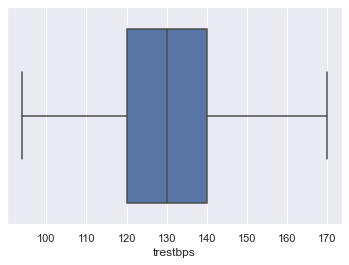

In [107]:
sns.boxplot(x = 'trestbps', data = df)

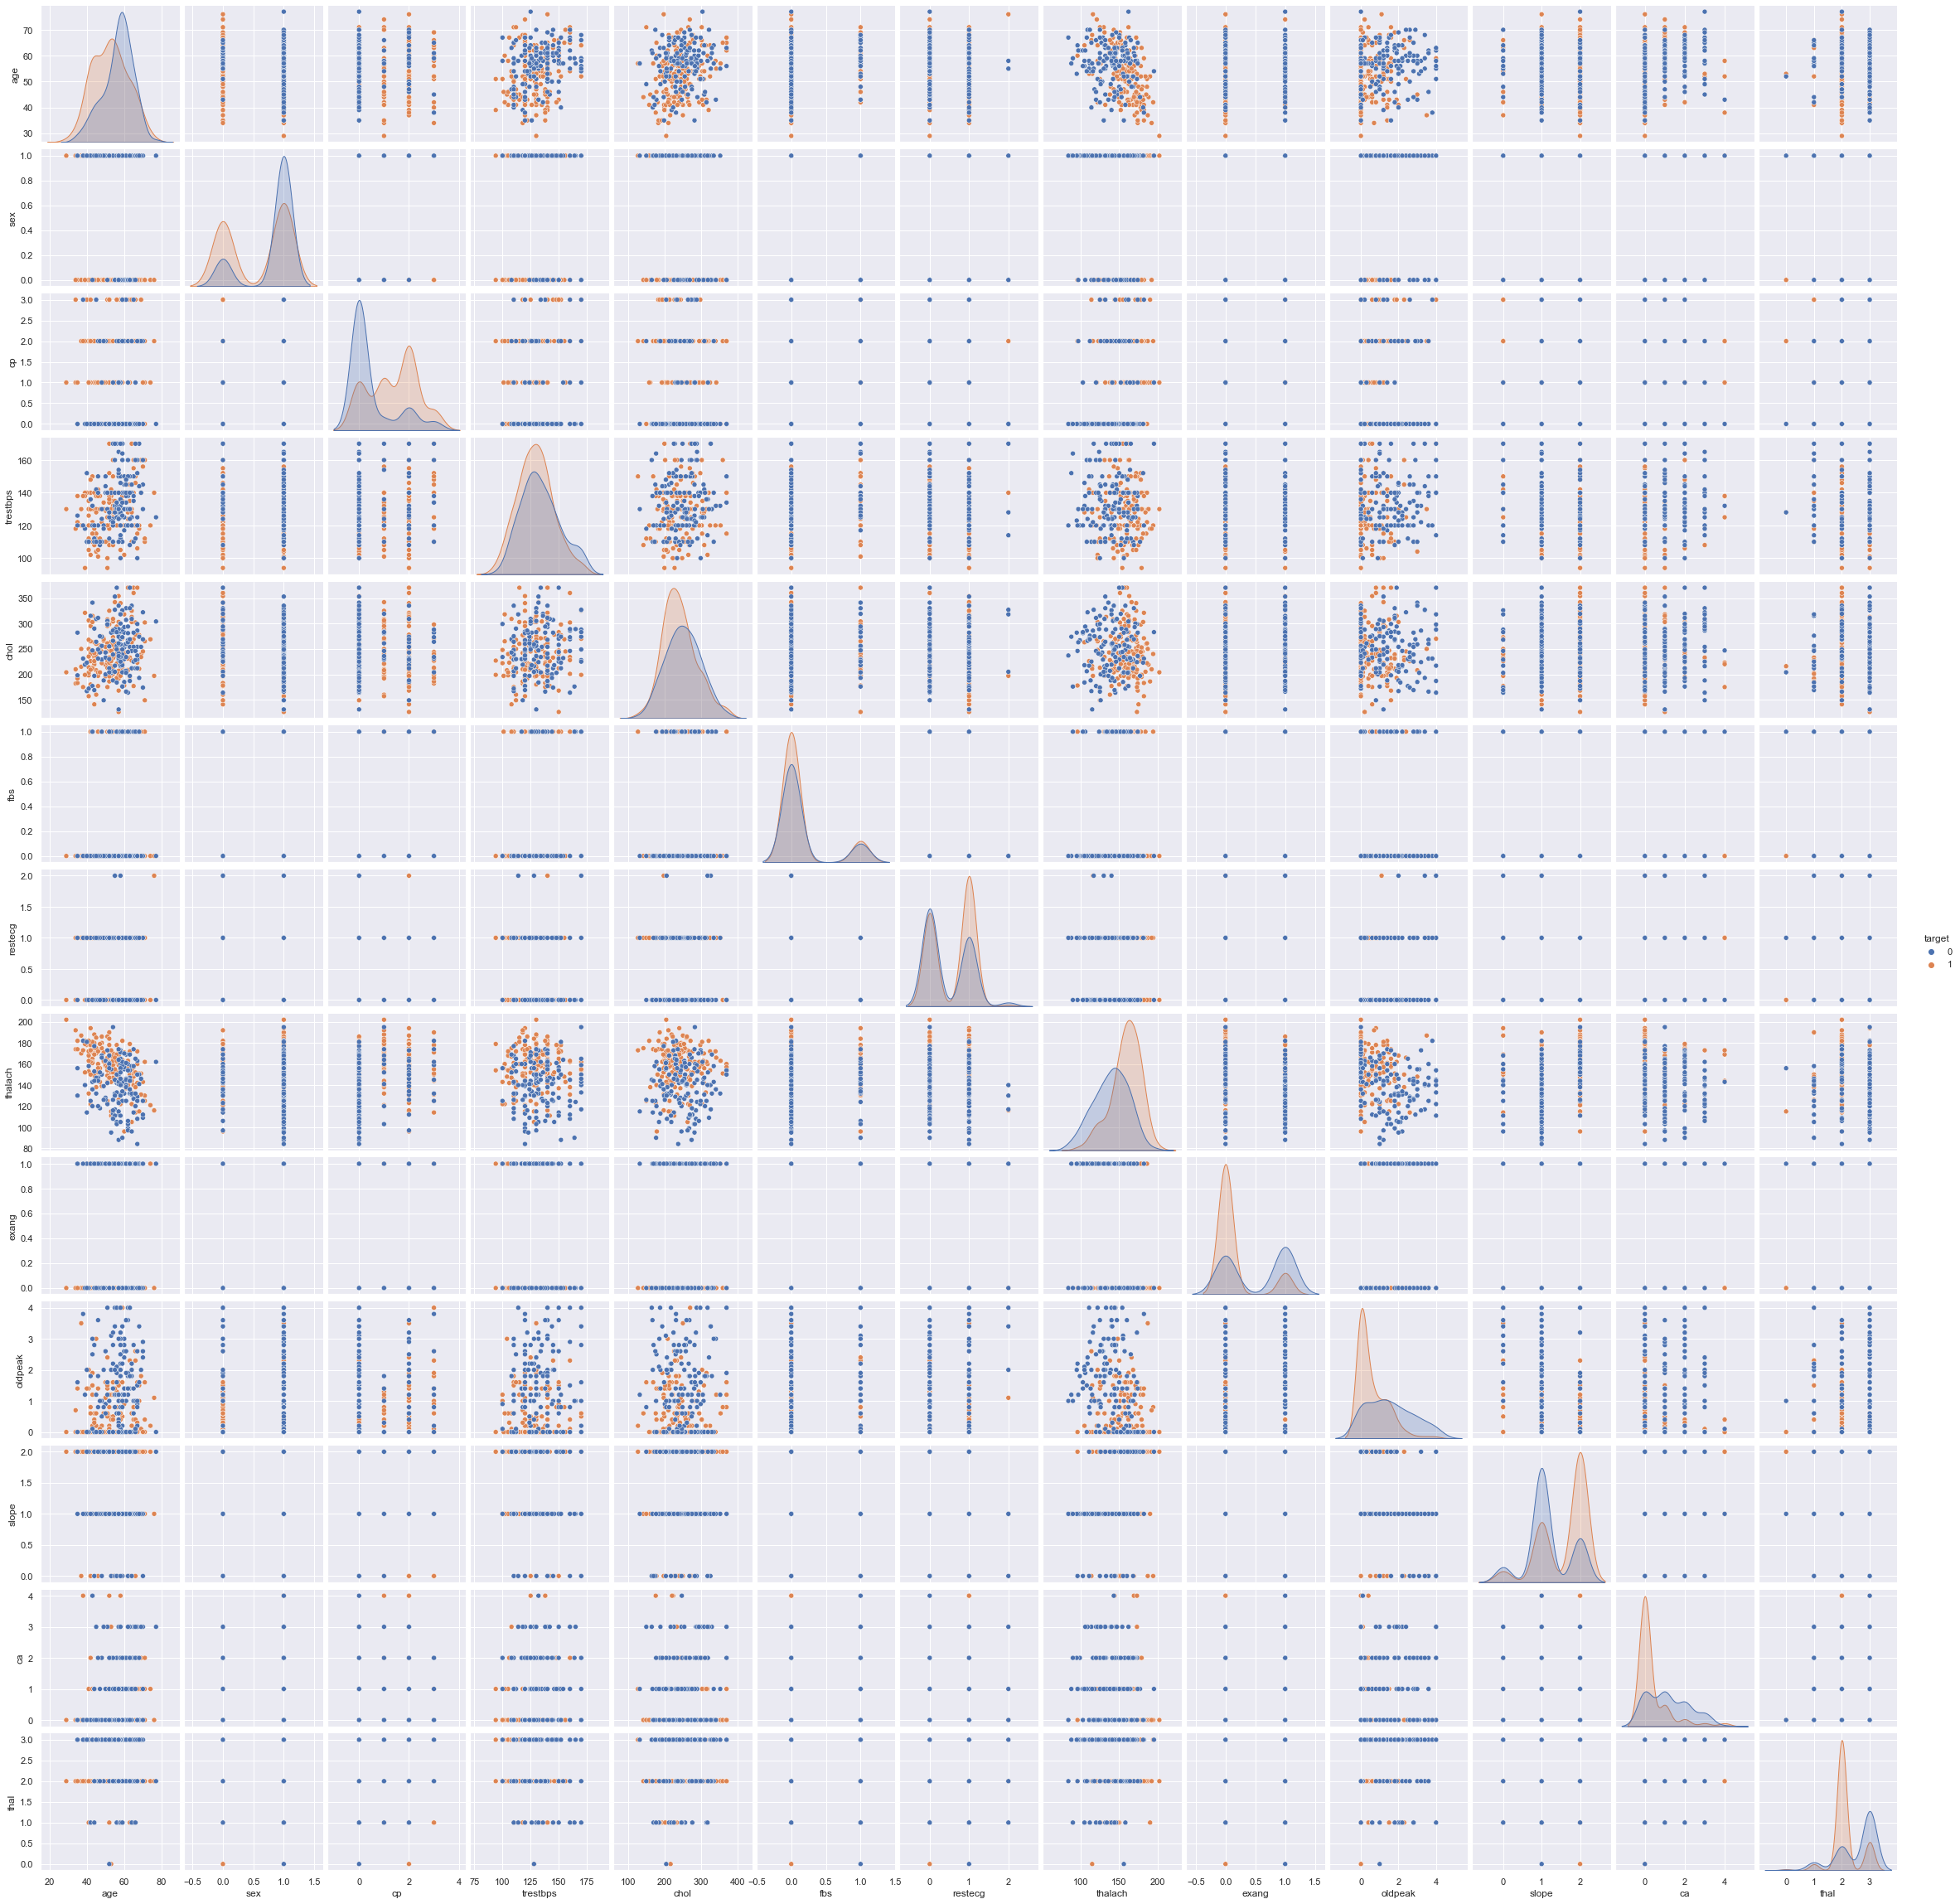

In [108]:
sns.pairplot(df,hue='target')

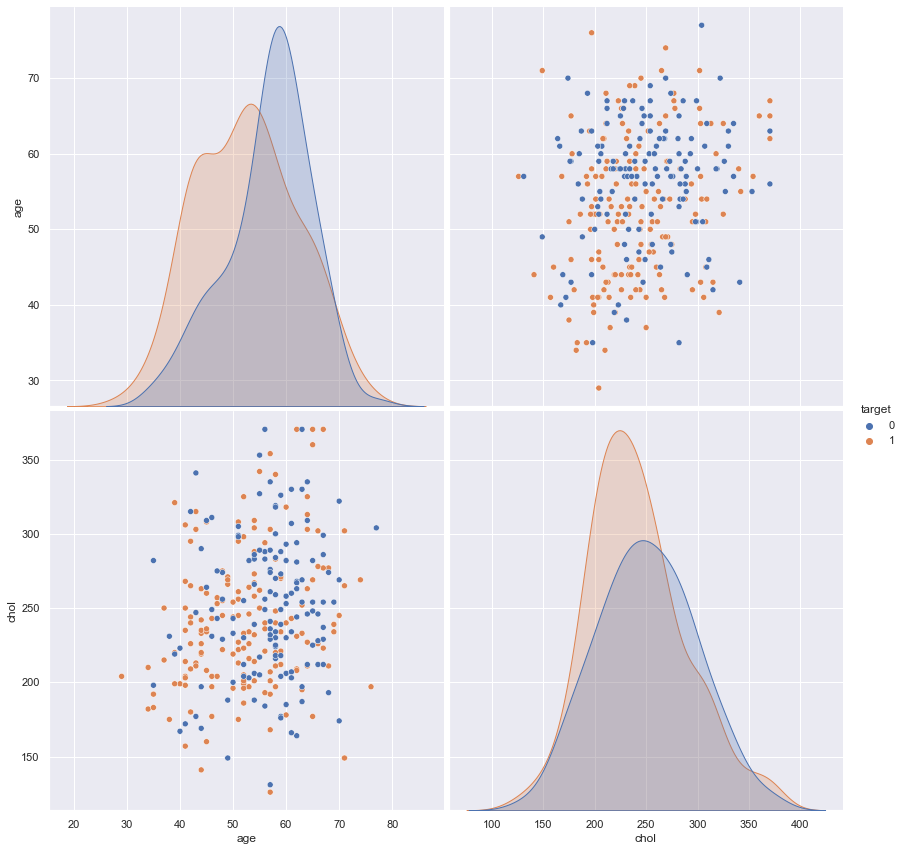

In [109]:
sns.pairplot(df, hue ='target', vars=['age', 'chol'], height=6, aspect=1 )

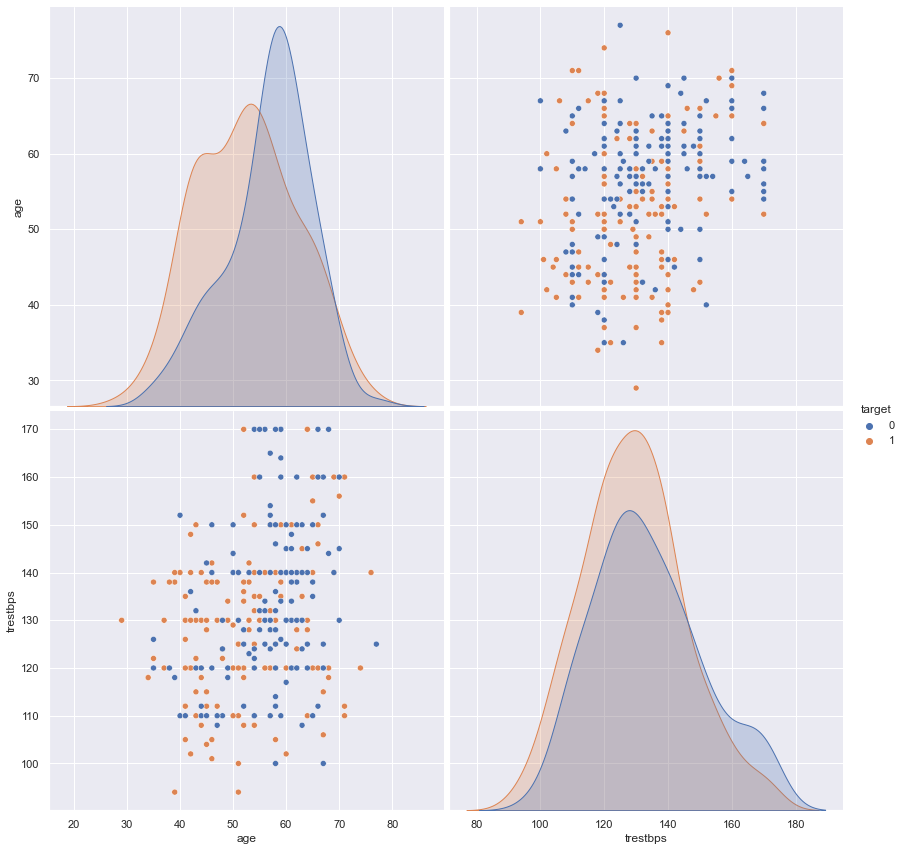

In [110]:
sns.pairplot(df, hue ='target', vars=['age', 'trestbps'], height=6, aspect=1 )

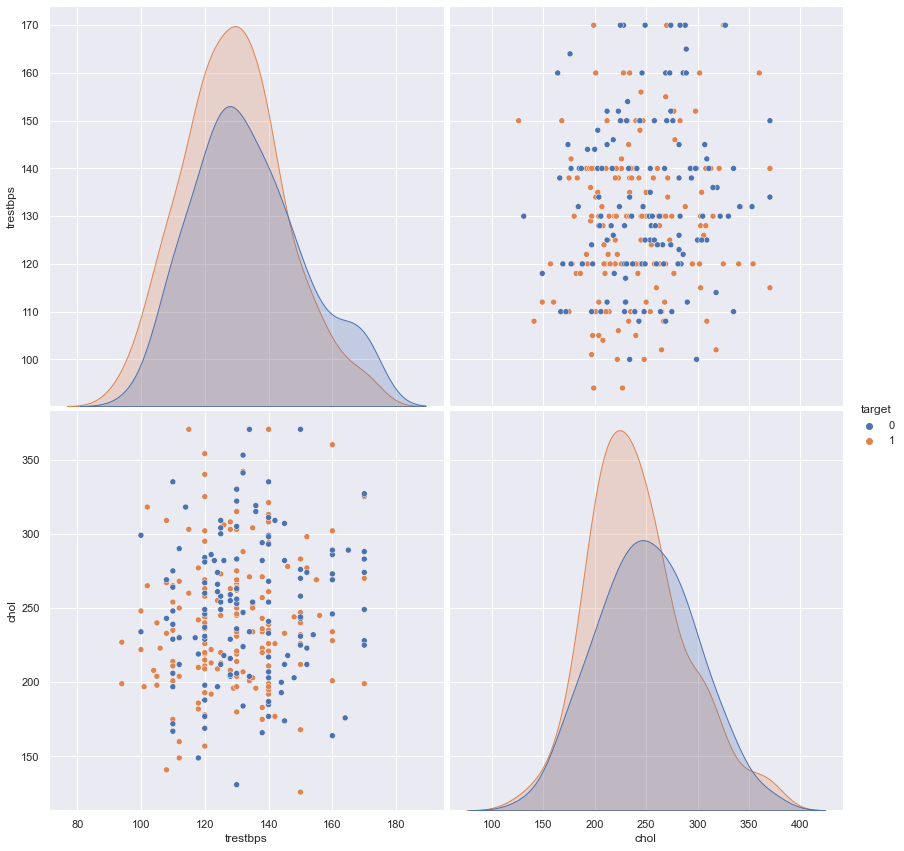

In [111]:
sns.pairplot(df, hue ='target', vars=['trestbps', 'chol'], height=6, aspect=1 )

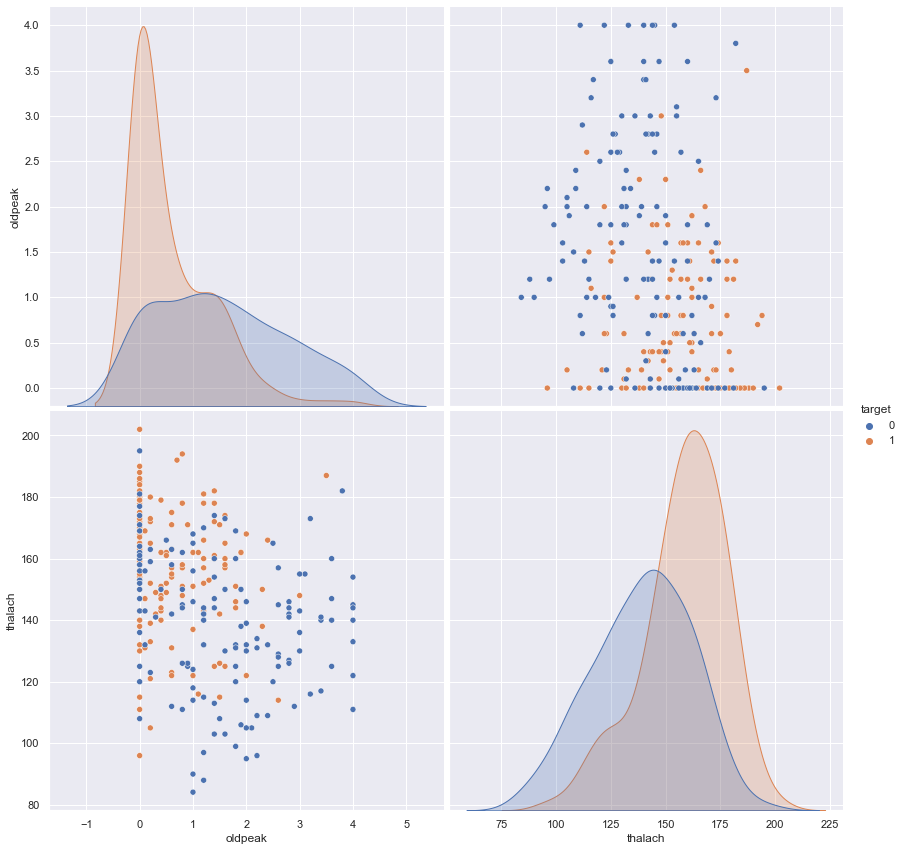

In [112]:
sns.pairplot(df, hue ='target', vars=['oldpeak', 'thalach'], height=6, aspect=1 )

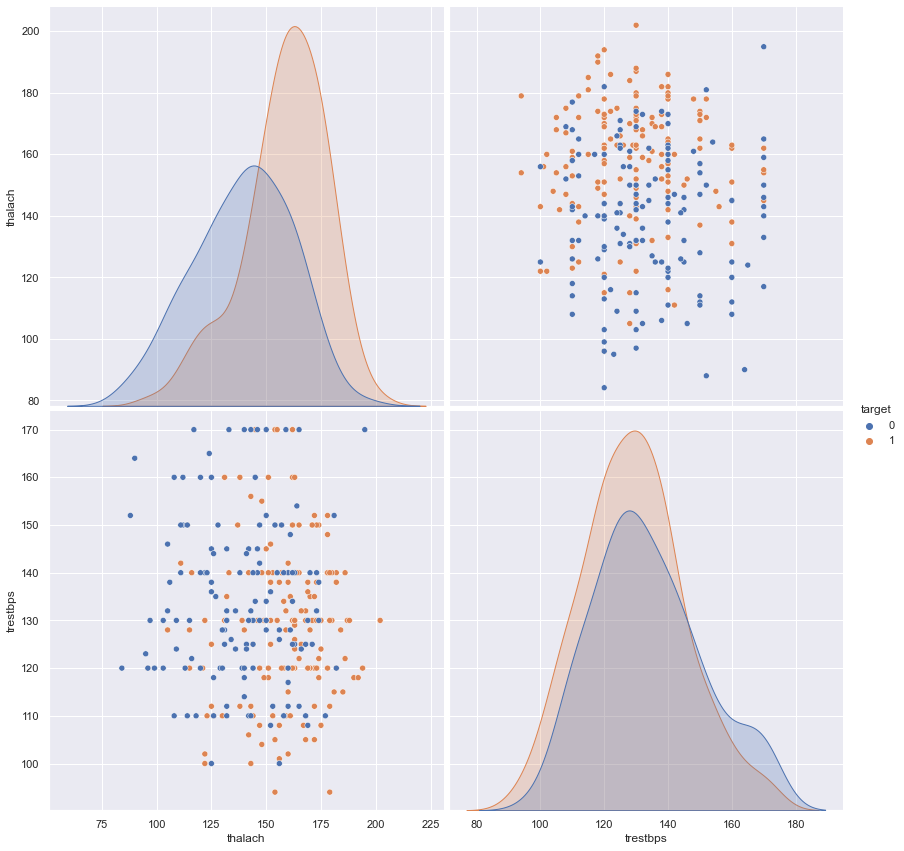

In [113]:
sns.pairplot(df, hue ='target', vars=['thalach', 'trestbps'], height=6, aspect=1 )

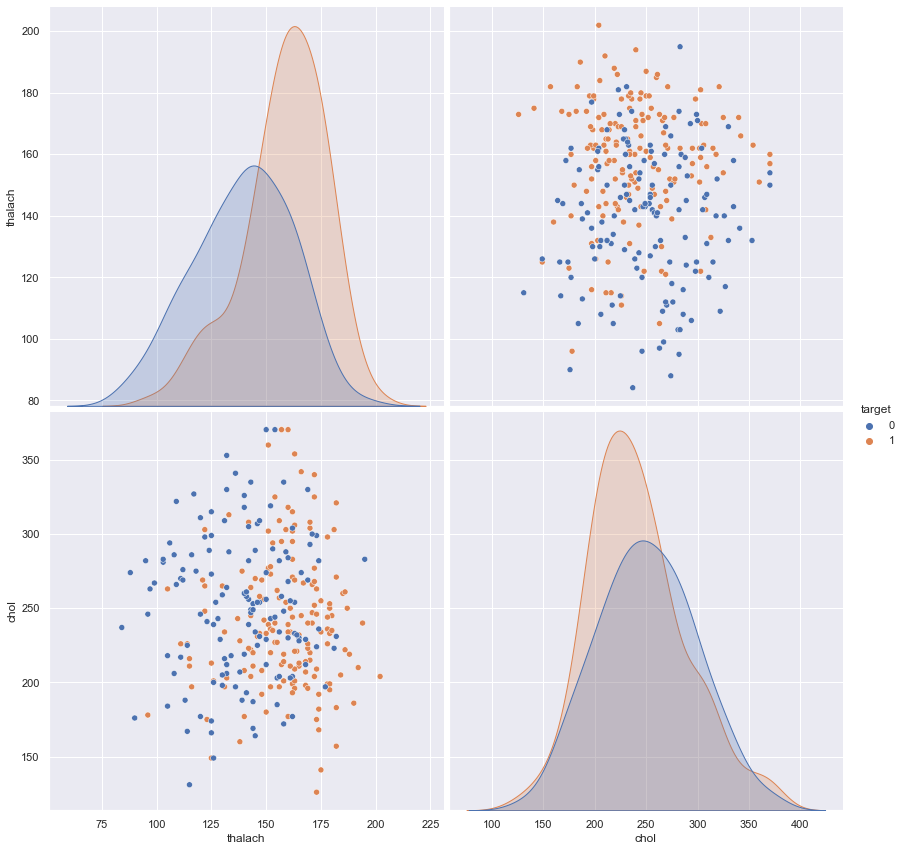

In [114]:
sns.pairplot(df, hue ='target', vars=['thalach', 'chol'], height=6, aspect=1 )

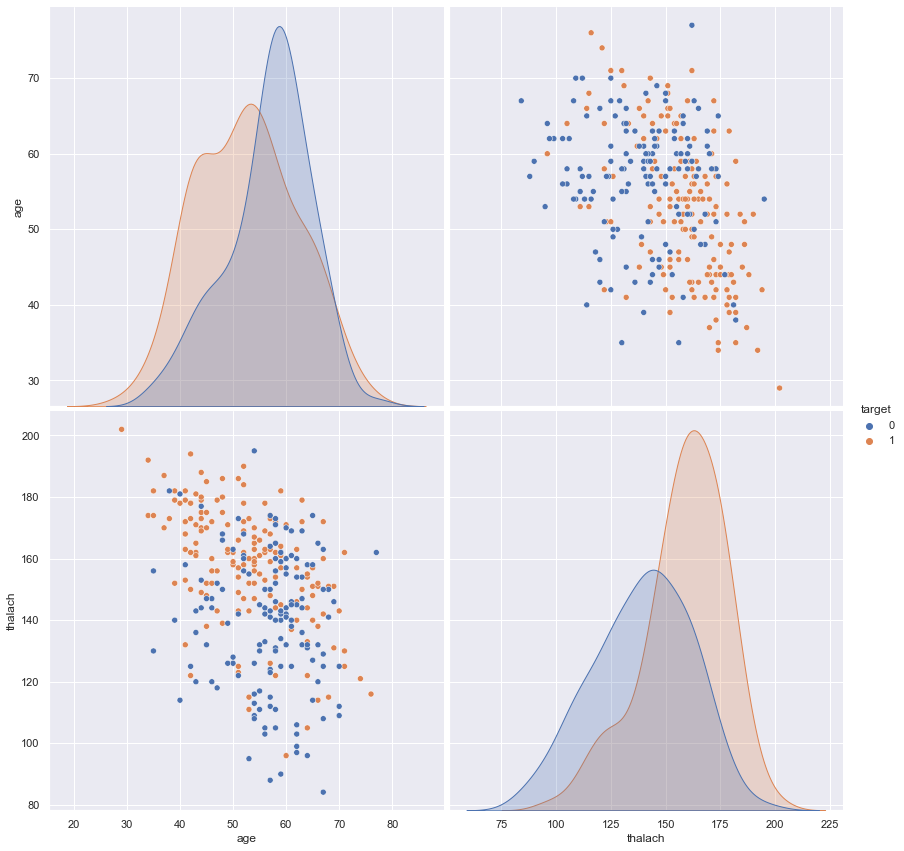

In [115]:
sns.pairplot(df, hue ='target', vars=['age', 'thalach'], height=6, aspect=1 )

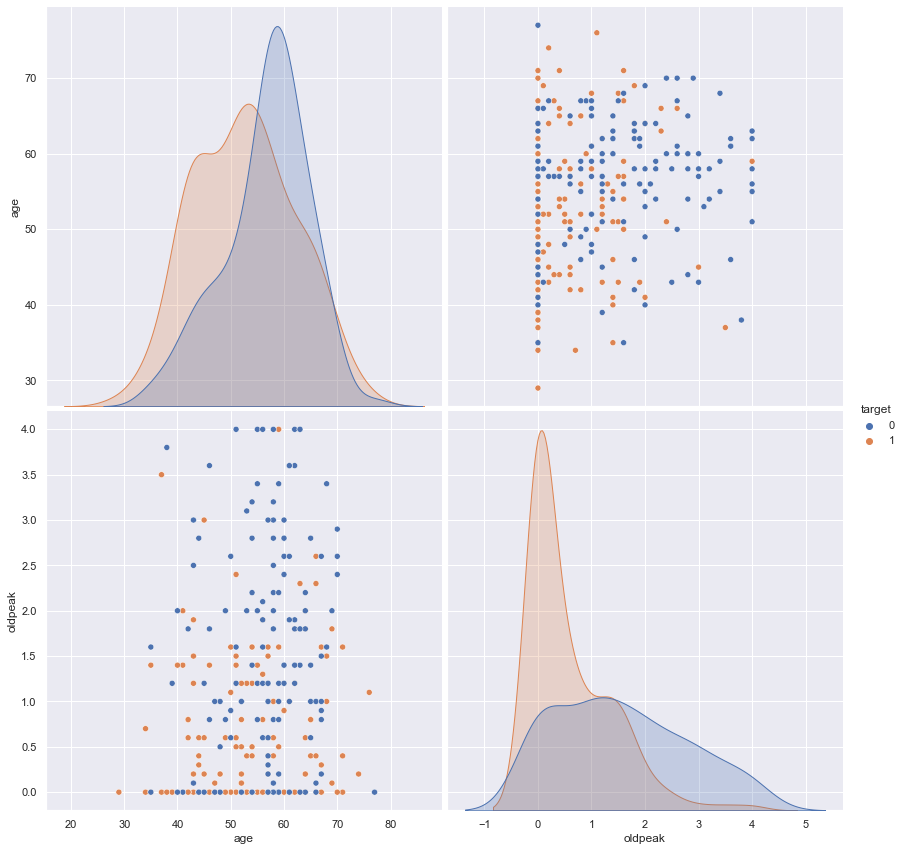

In [116]:
sns.pairplot(df, hue ='target', vars=['age', 'oldpeak'], height=6, aspect=1 )

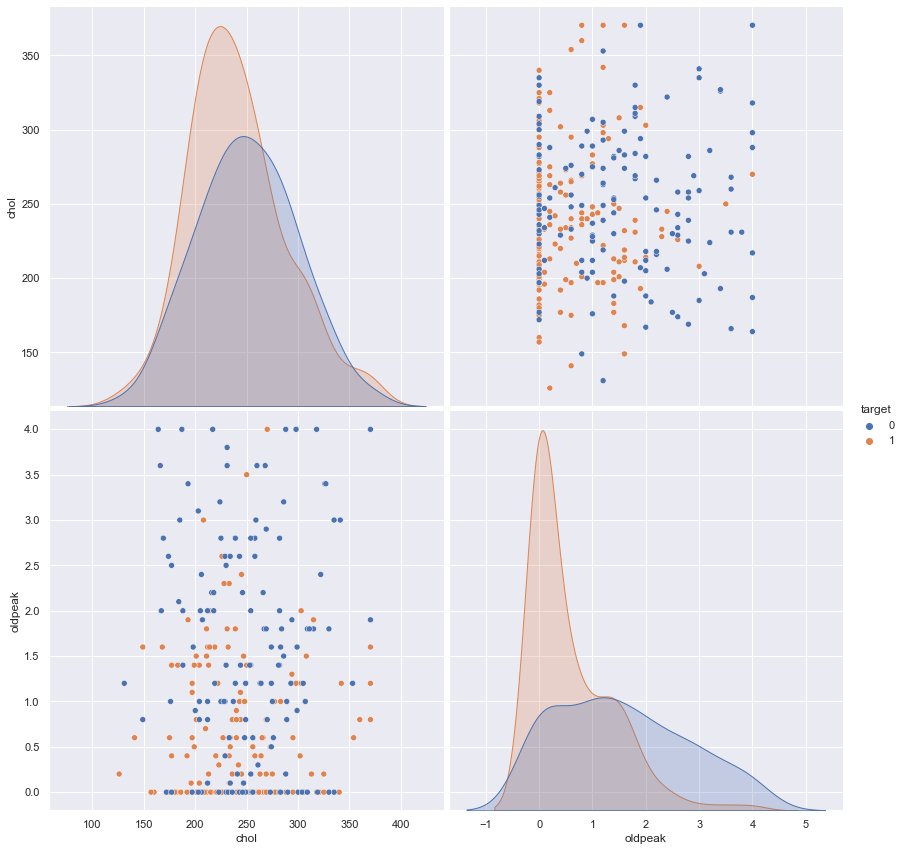

In [117]:
sns.pairplot(df, hue ='target', vars=['chol', 'oldpeak'], height=6, aspect=1 )

#Note:we dont need to do data manupulation as our data is already well organised and in csv file.we dont need to do data blending as it means of merging several csv files but we have only 1 csv file.Feature generation means generating more features.We have 37 features already.We can't generate more features for this dataset

In [118]:
# Convert Catergorical values to numeric representation

Since,the categorical values in our original dataset is already represented as discrete,numerical 
values so we don't need to convert them using get_dummies or LabelEncoder

# Partitioning

In [119]:
X = df.drop('target',axis=1)

In [120]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3
301,57,1,0,130.0,131.0,0,1,115.0,1,1.2,1,1,3


In [121]:
Y= df['target']

In [122]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [123]:
Y.value_counts()

1    164
0    138
Name: target, dtype: int64

In [125]:
#HoldOut Validation Approach - Train-test split

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)


In [127]:
y_test.value_counts()

1    46
0    45
Name: target, dtype: int64

In [128]:
#Stratified Train Test Split

In [129]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.30, random_state = 0, stratify = Y)


In [130]:
y1_train.value_counts()

1    115
0     96
Name: target, dtype: int64

In [131]:
y1_test.value_counts()

1    49
0    42
Name: target, dtype: int64

# Normalization

In [132]:
# Feature Scaling

In [133]:
#We always scale the features in the range between 0 to 1 after partitioning

In [134]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.258278,245.377070,0.149007,0.526490,149.612997,0.327815,1.027815,1.397351,0.718543,2.314570
std,9.04797,0.466426,1.032044,16.605232,47.486683,0.356686,0.526027,22.765983,0.470196,1.110395,0.616274,1.006748,0.613026
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,84.125000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.00000,1.000000,3.000000,170.000000,370.375000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000


In [135]:
scale_vars = []

for cols in X.columns:
    if X[cols].max() > 1:
        scale_vars.append(cols)
scale_vars

['age',
 'cp',
 'trestbps',
 'chol',
 'restecg',
 'thalach',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



In [137]:
#We will scale based on X_train and then transform both X_train and X_test

In [138]:
scaler.fit(X_train[scale_vars])
X_train[scale_vars] = scaler.transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [139]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
226,0.687500,1,0.333333,0.342105,0.626632,0,0.0,0.160127,0,0.35,0.5,0.25,1.0
152,0.729167,1,1.000000,1.000000,0.401044,0,0.0,0.601273,0,0.15,0.5,0.00,1.0
229,0.729167,1,0.666667,0.407895,0.743603,0,0.5,0.397667,1,0.45,0.5,0.00,1.0
202,0.604167,1,0.000000,0.736842,0.580679,0,0.0,0.227996,1,0.20,1.0,0.00,1.0
52,0.687500,1,0.666667,0.473684,0.417755,0,0.5,0.524920,0,0.45,0.5,0.75,1.0


In [140]:
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.529226,0.649289,0.328594,0.487092,0.472647,0.151659,0.274882,0.556206,0.336493,0.261967,0.699052,0.171801,0.763033
std,0.188658,0.478327,0.348054,0.213366,0.206226,0.359543,0.267767,0.199706,0.473633,0.280458,0.305815,0.248421,0.207485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.000000,0.000000,0.342105,0.317493,0.000000,0.000000,0.418876,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.541667,1.000000,0.333333,0.473684,0.455352,0.000000,0.500000,0.575822,0.000000,0.200000,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.605263,0.603655,0.000000,0.500000,0.707317,1.000000,0.400000,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [141]:
X_test.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,0.530449,0.758242,0.304029,0.497542,0.489800,0.142857,0.236264,0.554100,0.307692,0.245330,0.697802,0.197802,0.791209
std,0.189172,0.430521,0.335726,0.230986,0.179371,0.351866,0.251005,0.178021,0.464095,0.272027,0.315164,0.259584,0.196565
min,0.125000,0.000000,0.000000,0.000000,-0.020888,0.000000,0.000000,0.092259,0.000000,0.000000,0.000000,0.000000,0.333333
25%,0.406250,1.000000,0.000000,0.342105,0.355091,0.000000,0.000000,0.423118,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.583333,1.000000,0.333333,0.473684,0.472063,0.000000,0.000000,0.584305,0.000000,0.150000,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.605263,0.580679,0.000000,0.500000,0.686108,1.000000,0.450000,1.000000,0.250000,1.000000
max,0.937500,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.932131,1.000000,1.000000,1.000000,1.000000,1.000000


In [142]:
scaler.fit(X1_train[scale_vars])
X1_train[scale_vars] = scaler.transform(X1_train[scale_vars])
X1_test[scale_vars] = scaler.transform(X1_test[scale_vars])

In [143]:
X1_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
211,0.627907,1,0.000000,0.342105,0.548338,0,0.5,0.503946,1,0.90,0.5,0.25,1.000000
72,-0.116279,1,0.333333,0.473684,0.319182,0,0.0,1.063134,0,0.00,1.0,0.00,0.666667
110,0.697674,0,0.000000,1.000000,0.814322,0,0.5,0.630214,1,0.00,1.0,0.00,0.666667
112,0.697674,0,0.666667,0.605263,0.765217,0,0.5,0.440812,0,0.05,1.0,0.00,1.000000
42,0.255814,1,0.000000,0.131579,0.335550,0,0.0,0.576099,1,0.75,0.5,0.00,0.666667


In [144]:
X1_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.471509,0.696682,0.328594,0.493016,0.479155,0.180095,0.274882,0.585765,0.312796,0.255213,0.684834,0.184834,0.767773
std,0.211786,0.460784,0.346530,0.222080,0.186051,0.385180,0.263284,0.210219,0.464735,0.276956,0.318415,0.260873,0.209039
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.302326,0.000000,0.000000,0.342105,0.349872,0.000000,0.000000,0.431793,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.488372,1.000000,0.333333,0.473684,0.462404,0.000000,0.500000,0.621195,0.000000,0.200000,0.500000,0.000000,0.666667
75%,0.627907,1.000000,0.666667,0.605263,0.585166,0.000000,0.500000,0.738444,1.000000,0.400000,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
X1_test.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,0.482750,0.648352,0.304029,0.483806,0.510166,0.076923,0.236264,0.601967,0.362637,0.260989,0.730769,0.167582,0.780220
std,0.208161,0.480130,0.339383,0.210993,0.211750,0.267946,0.261838,0.194173,0.483425,0.280580,0.281935,0.229900,0.193855
min,-0.116279,0.000000,0.000000,0.000000,0.094118,0.000000,0.000000,0.188275,0.000000,0.000000,0.000000,0.000000,0.333333
25%,0.348837,0.000000,0.000000,0.342105,0.345780,0.000000,0.000000,0.494927,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.511628,1.000000,0.333333,0.473684,0.486957,0.000000,0.000000,0.612176,0.000000,0.200000,0.500000,0.000000,0.666667
75%,0.627907,1.000000,0.666667,0.605263,0.669054,0.000000,0.500000,0.729425,1.000000,0.450000,1.000000,0.250000,1.000000
max,0.860465,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.063134,1.000000,1.000000,1.000000,0.750000,1.000000


# Feature Selection

In [146]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
137,0.687500,1,0.333333,0.447368,0.321671,1,0.0,0.474019,0,0.000,1.0,0.00,0.666667
106,0.833333,1,1.000000,0.868421,0.430287,1,0.0,0.397667,0,0.025,0.5,0.25,0.666667
285,0.354167,1,0.000000,0.605263,0.751958,0,0.5,0.304348,1,0.450,0.5,0.50,1.000000
44,0.208333,1,0.666667,0.605263,0.793734,0,0.0,0.830329,0,0.000,1.0,0.00,0.666667
139,0.729167,1,0.000000,0.447368,0.551436,0,0.5,0.177094,1,0.050,0.5,0.25,1.000000


In [147]:
#Algorithm 3 - Feature Selection using Information Gain

In [148]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train, random_state = 20)
mutual_info


array([0.0015578 , 0.08813811, 0.09077926, 0.00602136, 0.03591178,
       0.00998714, 0.        , 0.05087404, 0.08296738, 0.06859355,
       0.10555611, 0.12320291, 0.14556304])

In [149]:
print(len(mutual_info))
print(X_train.shape)

13
(211, 13)


In [150]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

thal        0.145563
ca          0.123203
slope       0.105556
cp          0.090779
sex         0.088138
exang       0.082967
oldpeak     0.068594
thalach     0.050874
chol        0.035912
fbs         0.009987
trestbps    0.006021
age         0.001558
restecg     0.000000
dtype: float64

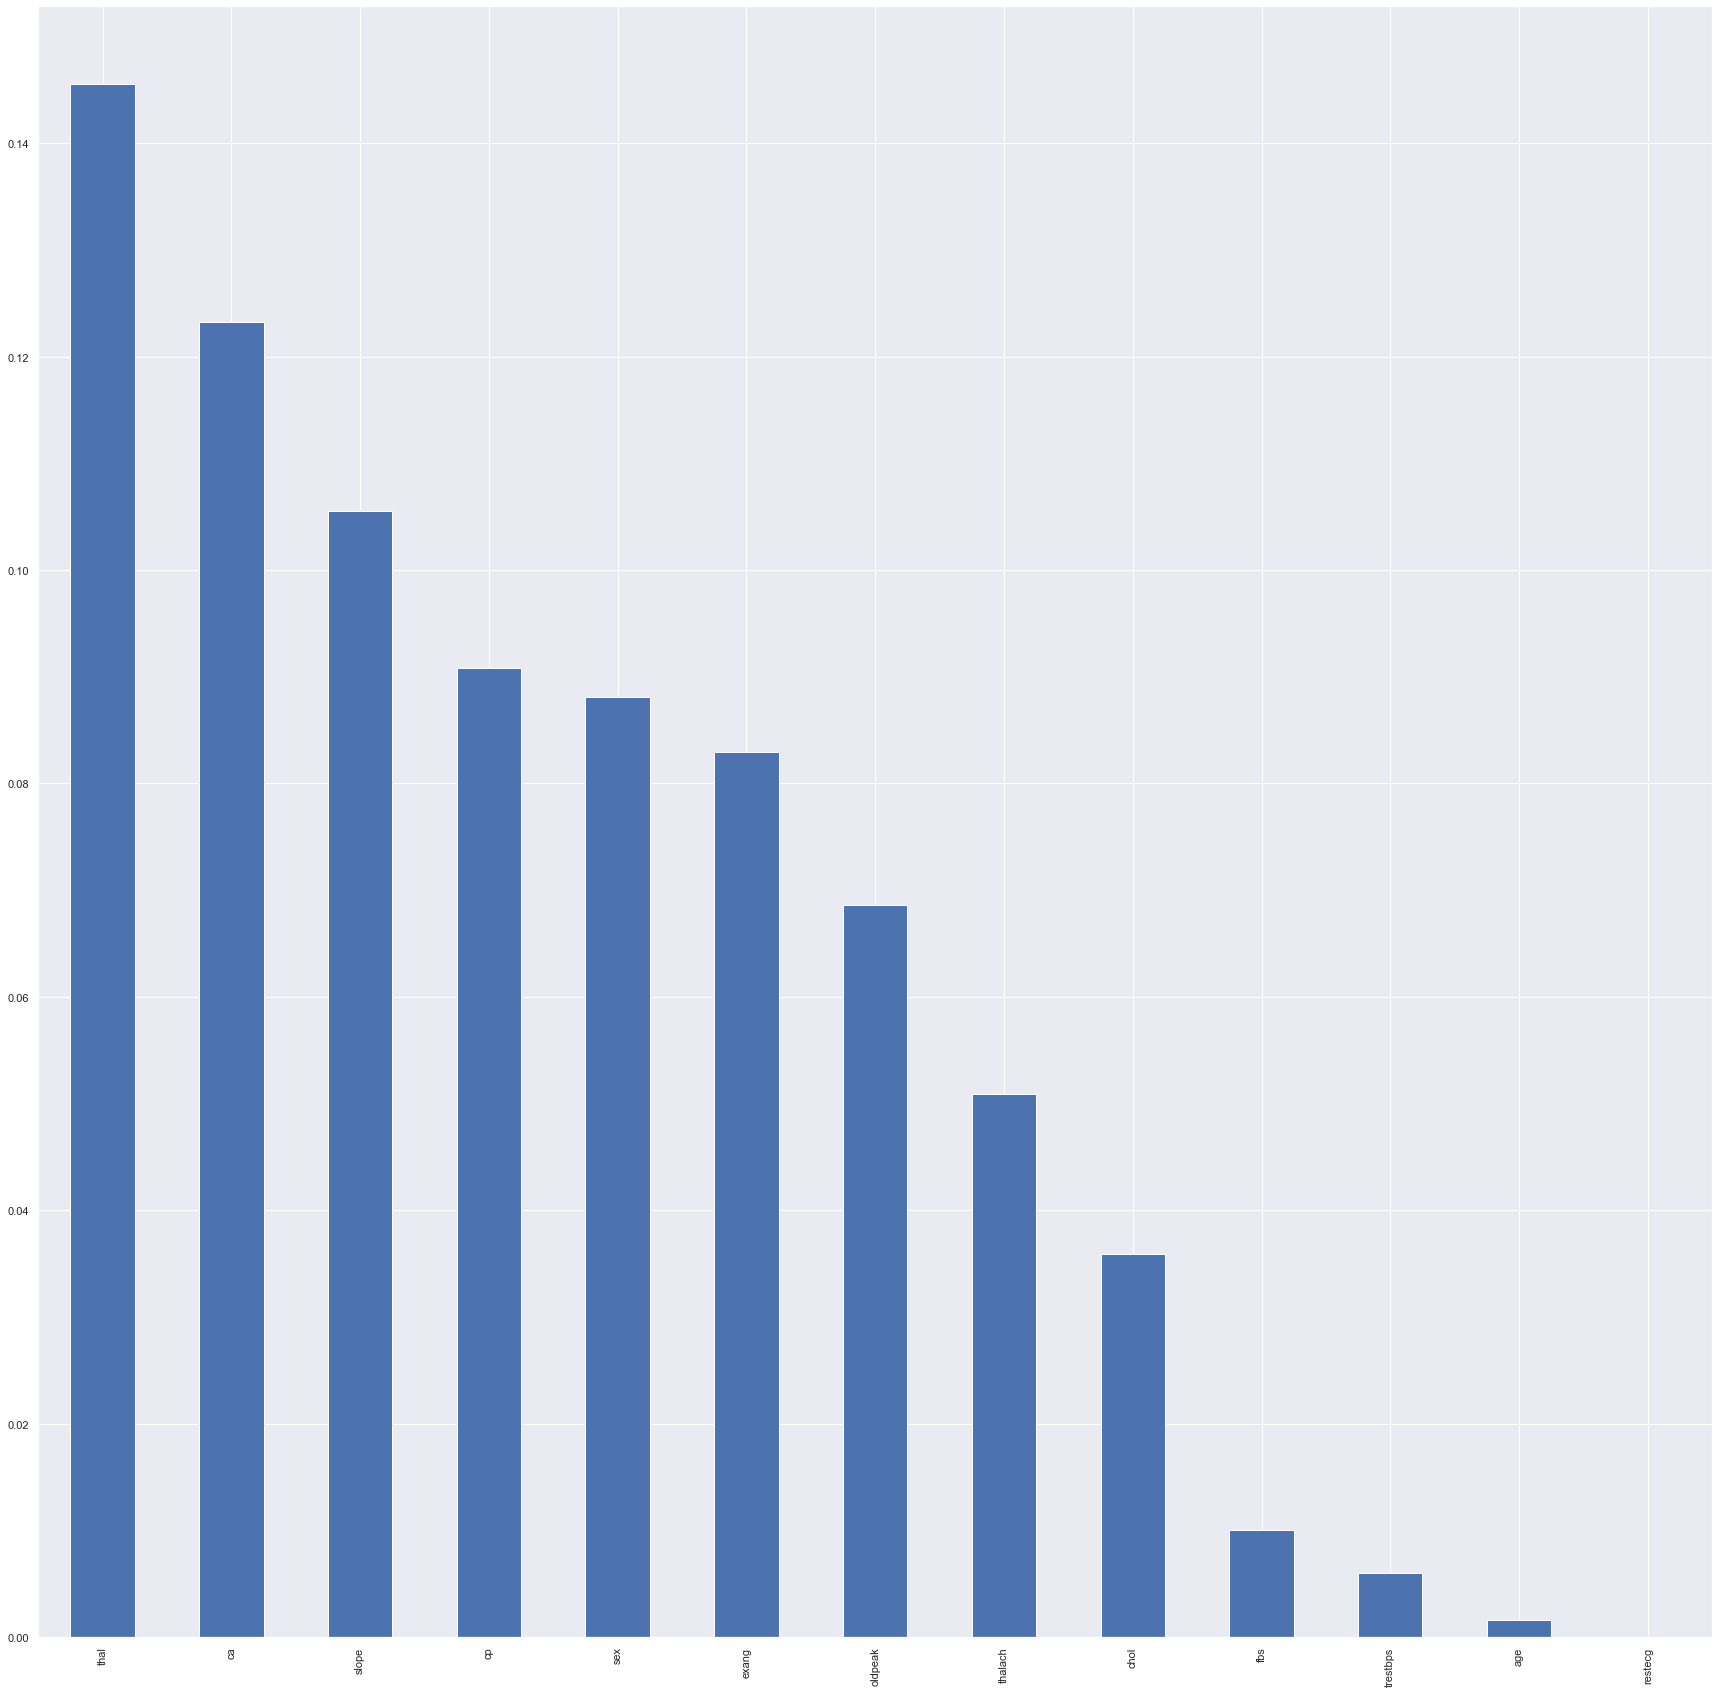

In [151]:
plt.figure(figsize = (30, 30))
mutual_info.sort_values(ascending = False).plot.bar();

In [152]:
#Algorithm 4 - Feature Selection using RFECV (Recursive Feature Elimination with Cross Validation)

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

In [154]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 12


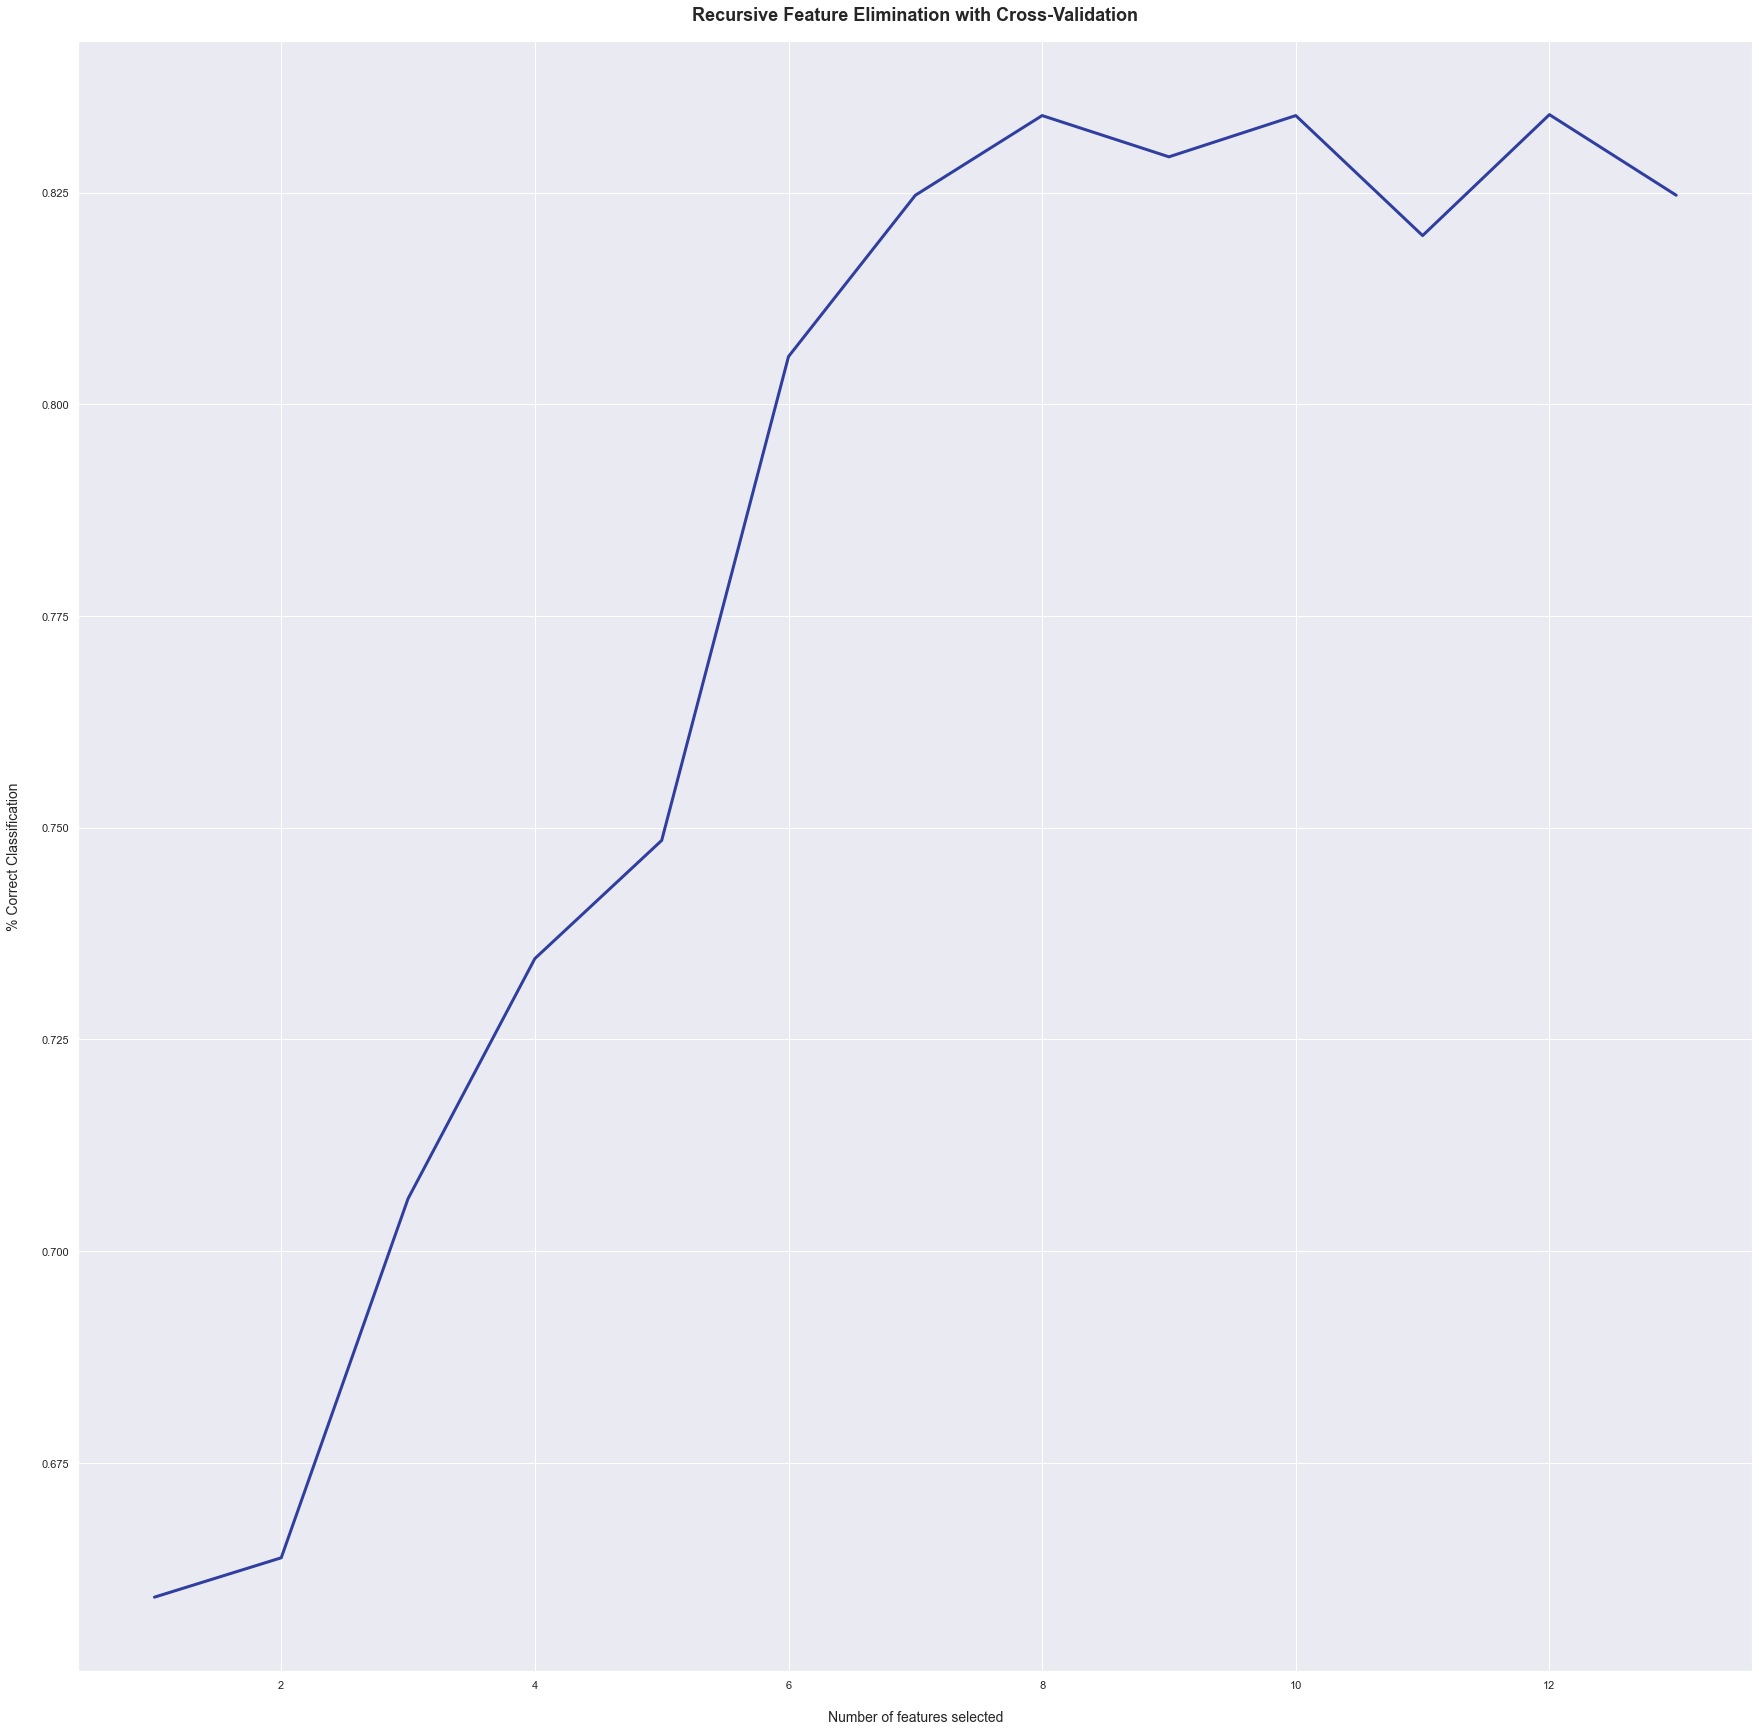

In [155]:
plt.figure(figsize=(30, 30))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

In [156]:
print(np.where(rfecv.support_ == False)[0])

[5]


In [157]:
selected_features = X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1)

In [158]:
rfecv.estimator_.feature_importances_

array([0.0756658 , 0.04799957, 0.10915328, 0.07363189, 0.07326914,
       0.01355113, 0.11461406, 0.06471754, 0.12395621, 0.05756203,
       0.13692363, 0.10895572])

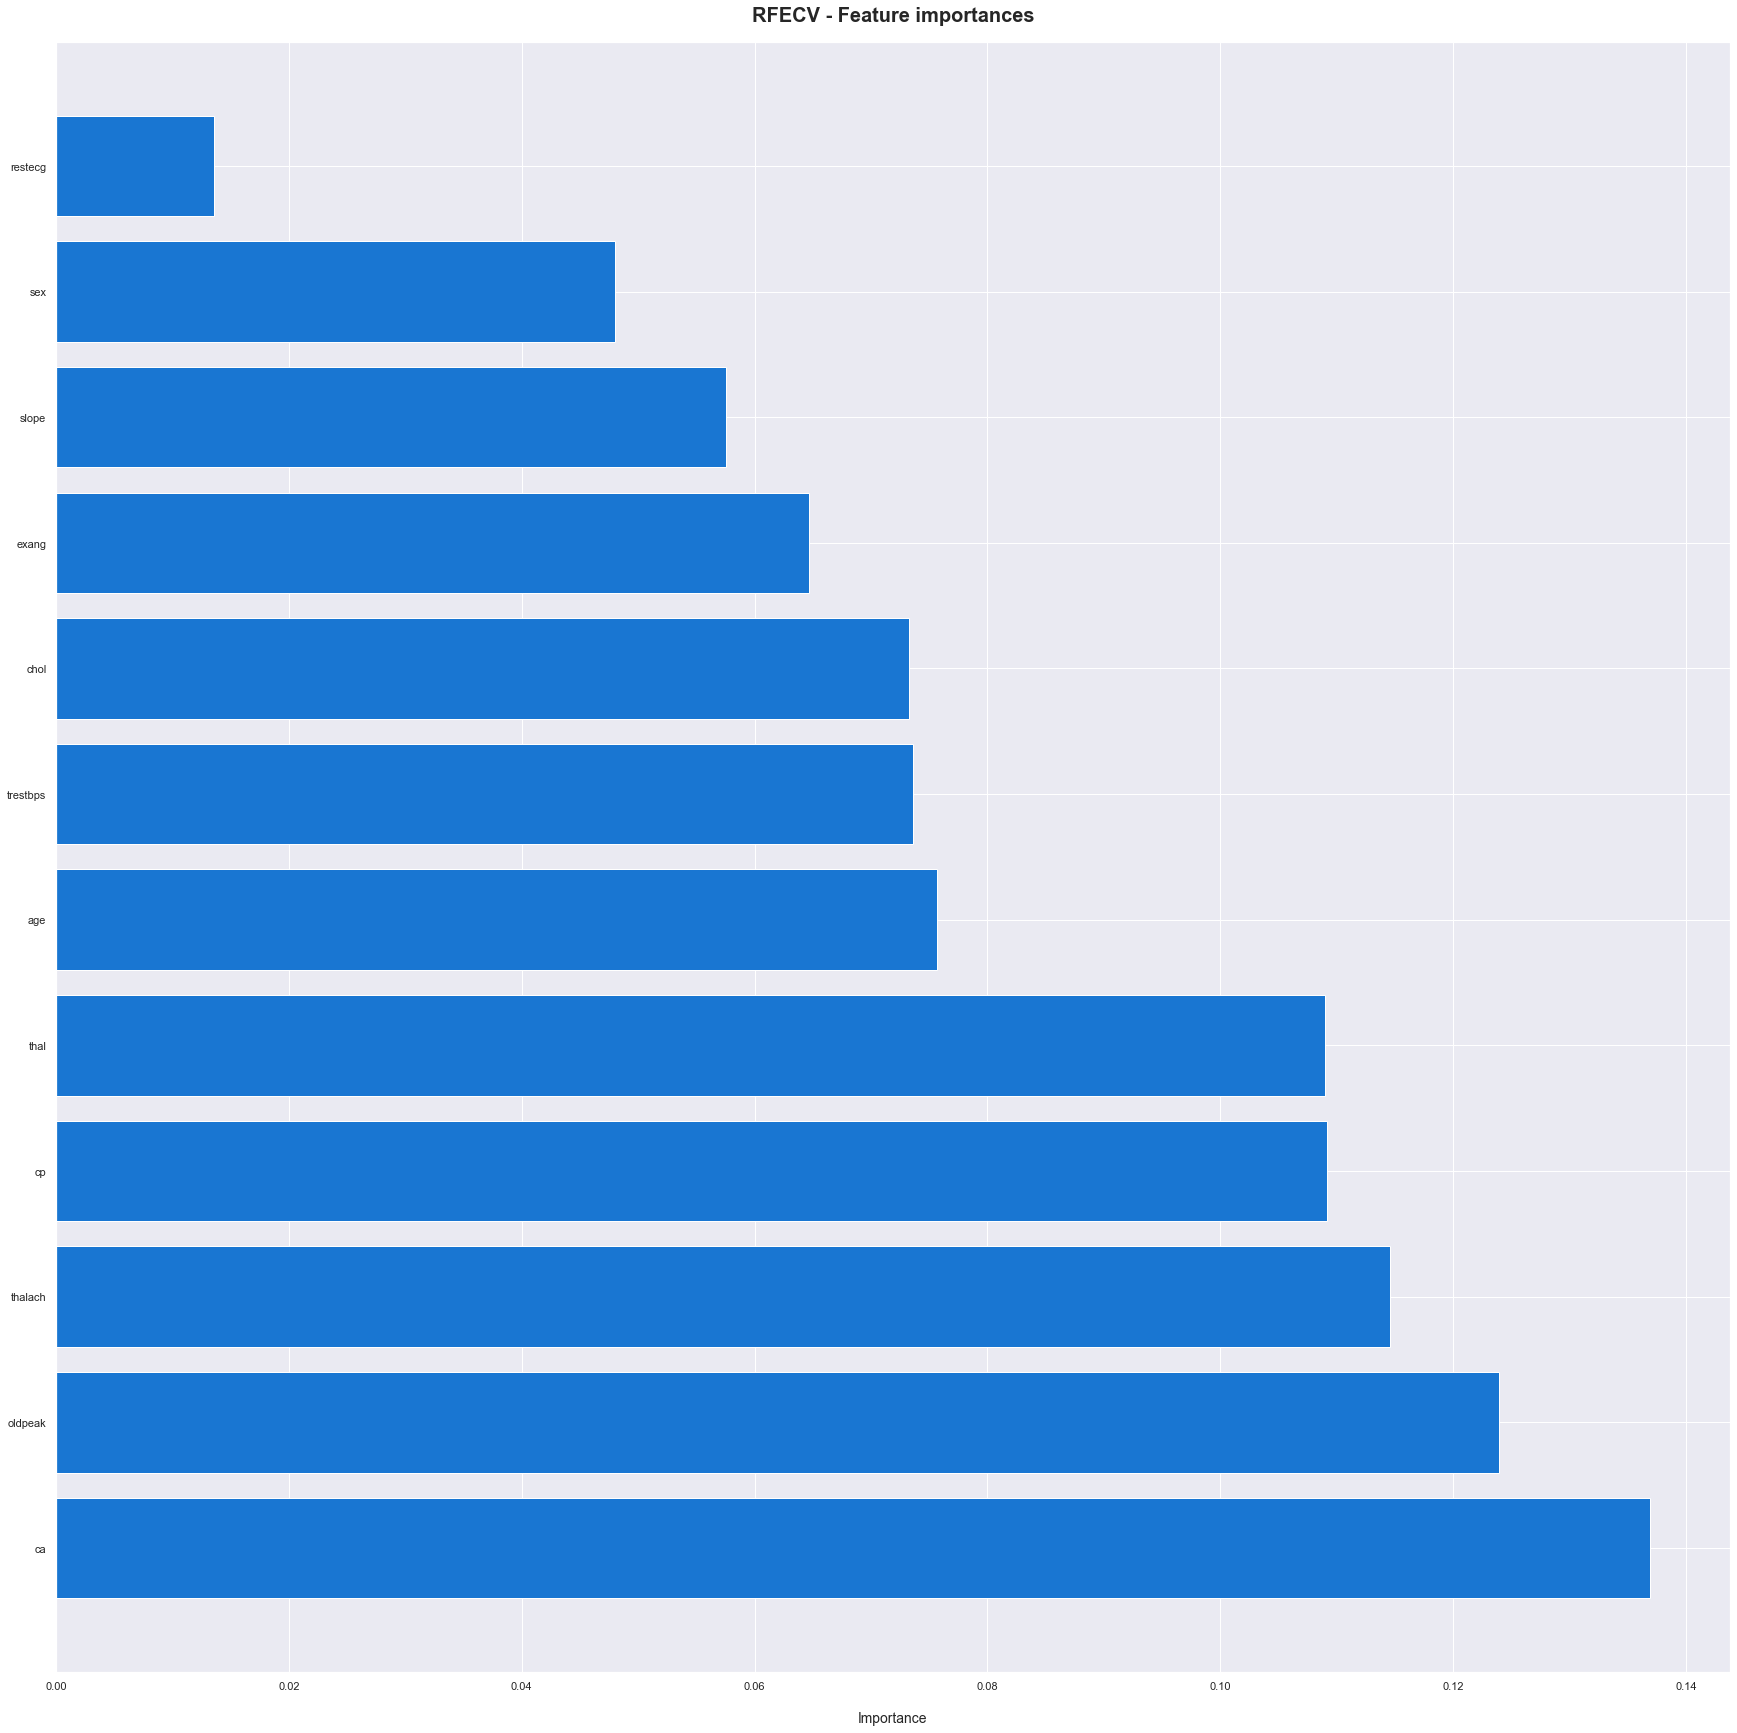

In [159]:
dset = pd.DataFrame()
dset['attr'] = selected_features.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(30, 30))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()


In [160]:
dset

,attr,importance
10,ca,0.136924
8,oldpeak,0.123956
6,thalach,0.114614
2,cp,0.109153
11,thal,0.108956
0,age,0.075666
3,trestbps,0.073632
4,chol,0.073269
7,exang,0.064718
9,slope,0.057562


In [161]:
#Algorithm 1 - Dropping Constant Features using Variance Threshold Technique


In [162]:
from sklearn.feature_selection import VarianceThreshold
# By default, the threshold = 0 i.e. it will remove the zero-variance threshold
var_thresh = VarianceThreshold() # by default the threshold = 0
var_thresh.fit(X_train)

VarianceThreshold()

In [163]:
print("Features Selected: ", X_train.columns[var_thresh.get_support()])

Features Selected:  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [164]:
len(X_train.columns[var_thresh.get_support()])

13

In [165]:
#There's no feature with zero variance

In [166]:
#Algorithm 2 - Feature Selection with Pearson's correlation


In [167]:
#Idea Highly correlated features with the target variable are important features, High correlation between features, (say over 90% or over 80%) indicate the existence of duplicate features.In case of duplicate features, we do not need to take all the features but one one of them would suffice


In [168]:
# Let's find the feature correlations

corr = X_train.corr()
corr

# Note that the correlation values lie between -1 and +1
# A correlation value close to -1 indicates a strong negative linear correlation
# A correlation value close to +1 indicates a strong positive linear correlation
# A correlation value close to 0 indicates no linear correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.160715,-0.048242,0.258986,0.201631,0.201993,-0.013482,-0.377694,0.082601,0.172560,-0.123666,0.251150,0.065410
sex,-0.160715,1.000000,-0.086306,-0.116399,-0.170439,0.006168,-0.080261,-0.018229,0.208099,0.107752,-0.073901,0.088696,0.214208
cp,-0.048242,-0.086306,1.000000,-0.014608,-0.034512,0.107244,0.014045,0.312477,-0.413946,-0.152269,0.158031,-0.192476,-0.176811
trestbps,0.258986,-0.116399,-0.014608,1.000000,0.159724,0.228196,-0.048364,-0.063847,0.100227,0.206301,-0.068462,0.149019,0.029648
chol,0.201631,-0.170439,-0.034512,0.159724,1.000000,0.057925,-0.059120,0.022639,0.017937,-0.005036,0.055772,0.076809,0.054739
fbs,0.201993,0.006168,0.107244,0.228196,0.057925,1.000000,-0.138306,-0.083836,0.006494,-0.011000,-0.124280,0.173397,-0.133010
restecg,-0.013482,-0.080261,0.014045,-0.048364,-0.059120,-0.138306,1.000000,0.003906,-0.038170,0.003546,0.084610,-0.077991,0.035205
thalach,-0.377694,-0.018229,0.312477,-0.063847,0.022639,-0.083836,0.003906,1.000000,-0.362534,-0.335635,0.428375,-0.215732,-0.104955
exang,0.082601,0.208099,-0.413946,0.100227,0.017937,0.006494,-0.038170,-0.362534,1.000000,0.310102,-0.300247,0.133643,0.201480
oldpeak,0.172560,0.107752,-0.152269,0.206301,-0.005036,-0.011000,0.003546,-0.335635,0.310102,1.000000,-0.557432,0.227082,0.140343


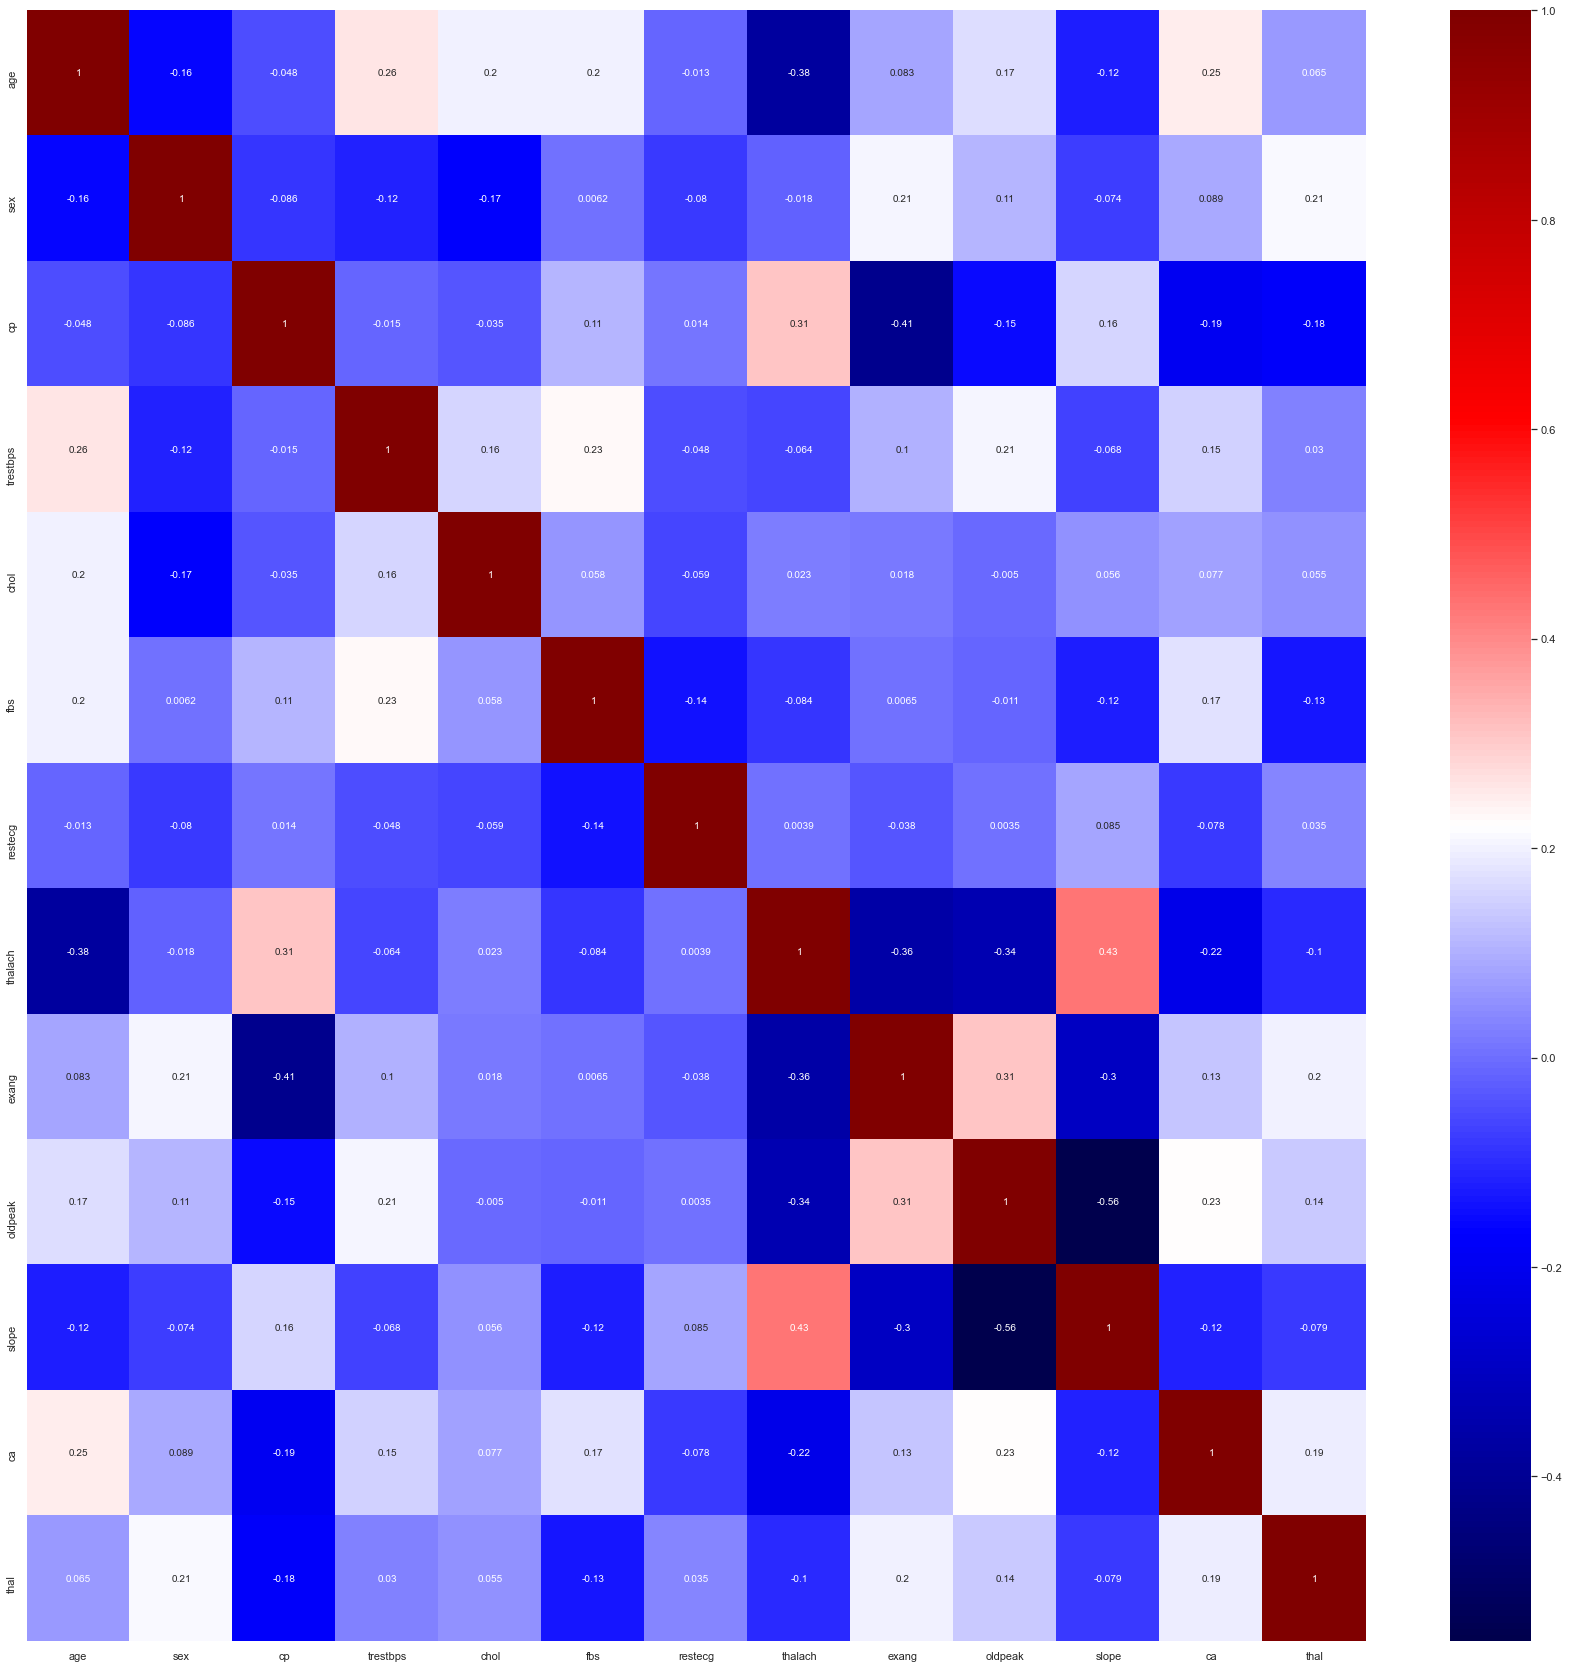

In [169]:
plt.figure(figsize = (30,30))
sns.heatmap(corr, annot = True, cmap = "seismic");

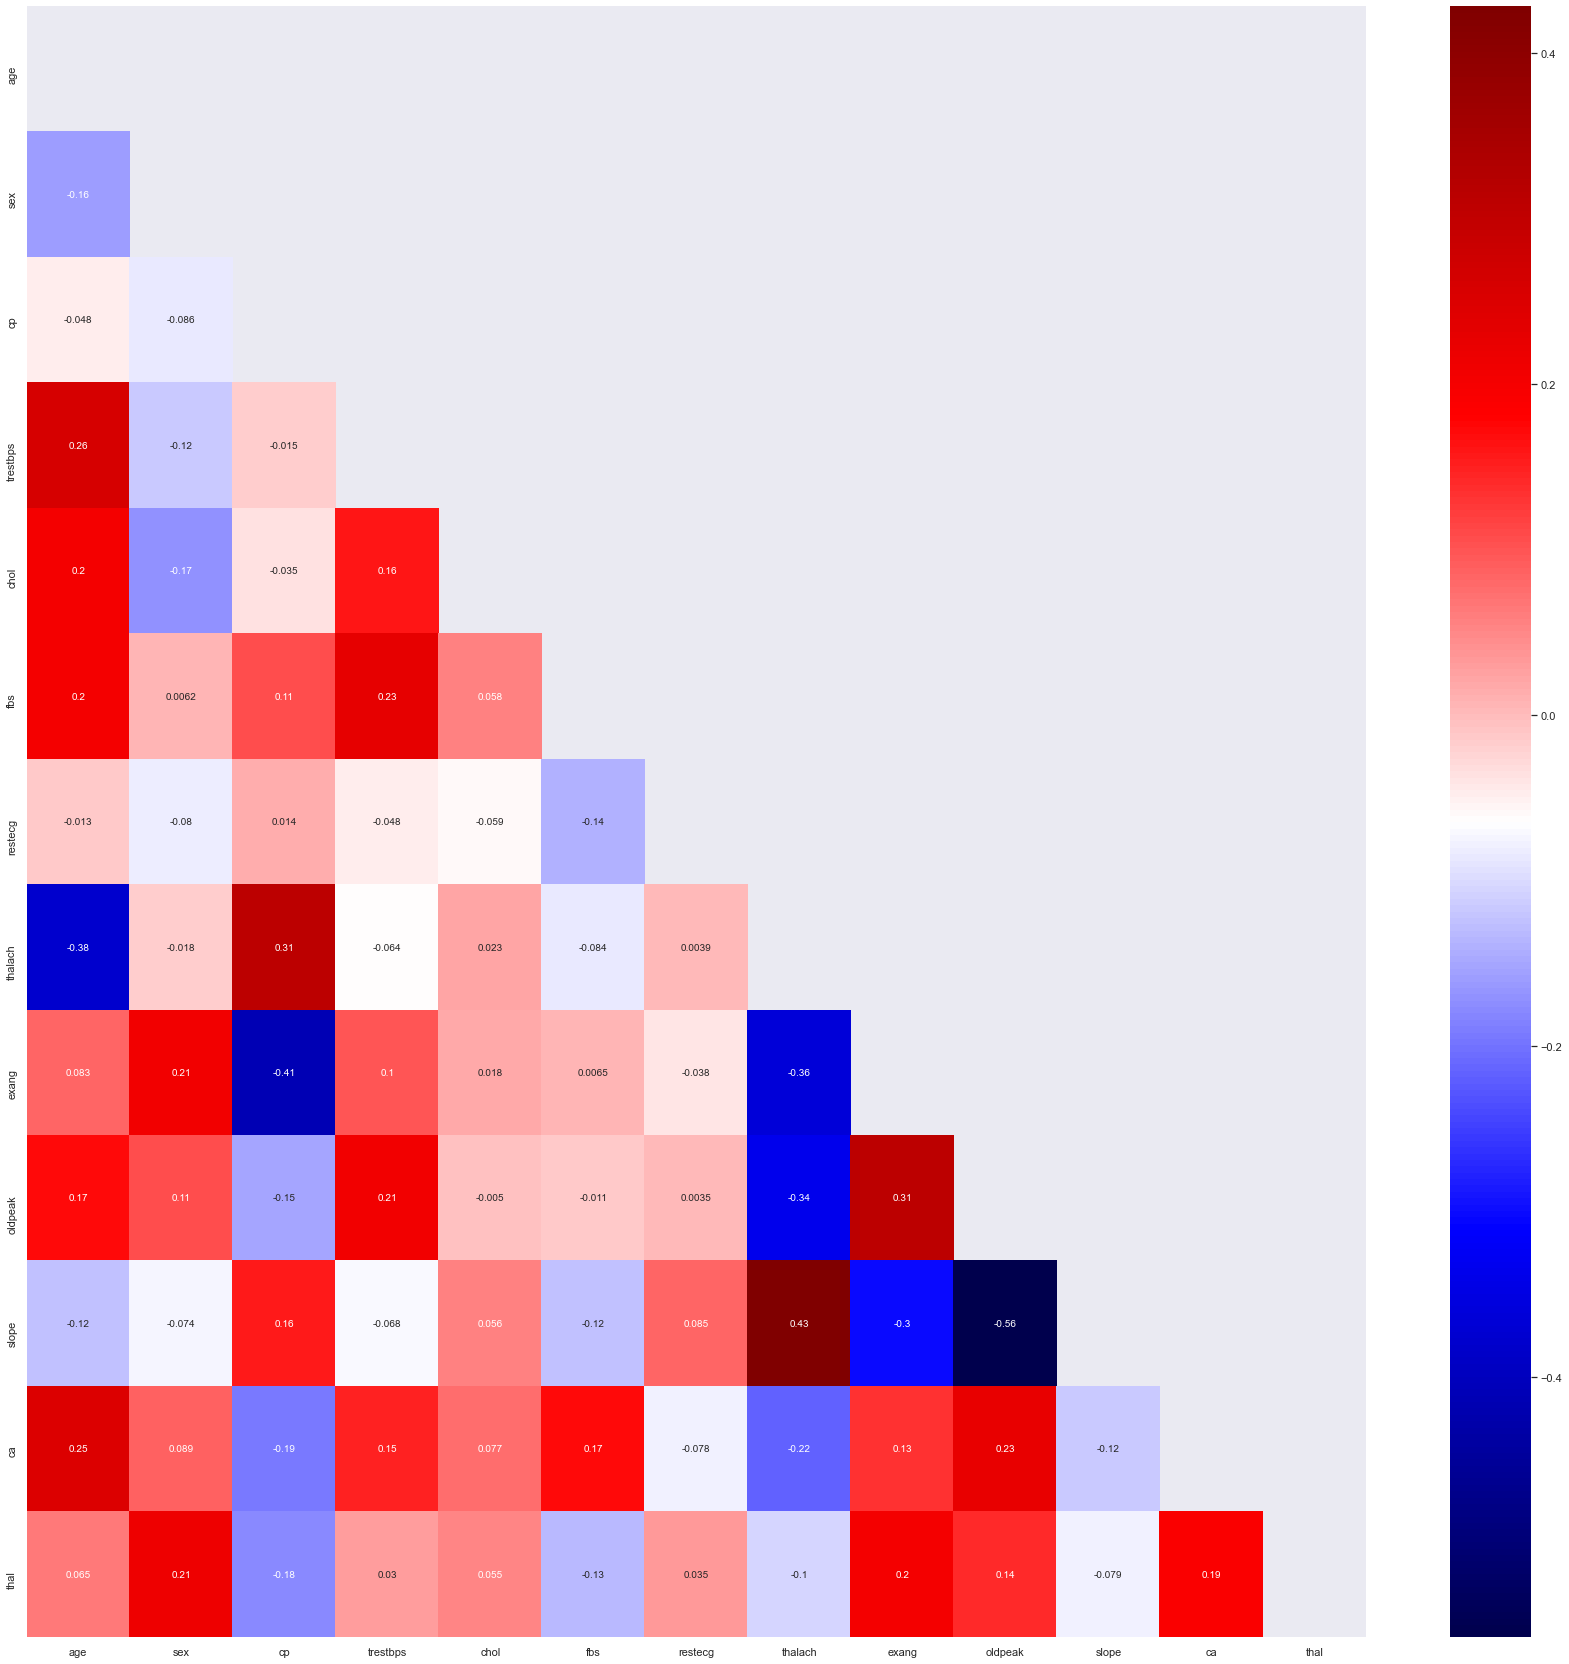

In [170]:
# use of the mask 
import numpy as np
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (30,30))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [171]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [172]:
corr_features = correlation(X_train, 0.85) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

0
set()


In [173]:
X_train.drop(columns = 'restecg', axis=1, inplace=True)
X_test.drop(columns = 'restecg', axis=1, inplace=True)

print(X_train)
print(X_test)

          age  sex        cp  trestbps      chol  fbs   thalach  exang  \
137  0.687500    1  0.333333  0.447368  0.321671    1  0.474019      0   
106  0.833333    1  1.000000  0.868421  0.430287    1  0.397667      0   
285  0.354167    1  0.000000  0.605263  0.751958    0  0.304348      1   
44   0.208333    1  0.666667  0.605263  0.793734    0  0.830329      0   
139  0.729167    1  0.000000  0.447368  0.551436    0  0.177094      1   
..        ...  ...       ...       ...       ...  ...       ...    ...   
252  0.687500    0  0.000000  0.578947  0.680940    1  0.185578      0   
193  0.645833    1  0.000000  0.671053  0.630809    0  0.490986      1   
117  0.562500    1  1.000000  0.342105  0.259008    0  0.660657      0   
47   0.375000    1  0.666667  0.578947  0.526371    0  0.609756      0   
173  0.604167    1  0.666667  0.500000  0.388512    0  0.753977      0   

     oldpeak  slope    ca      thal  
137    0.000    1.0  0.00  0.666667  
106    0.025    0.5  0.25  0.666667

In [174]:
X1_train.drop(columns = 'restecg', axis=1, inplace=True)
X1_test.drop(columns = 'restecg', axis=1, inplace=True)

print(X1_train)
print(X1_test)

          age  sex        cp  trestbps      chol  fbs   thalach  exang  \
275  0.418605    1  0.000000  0.407895  0.351918    0  0.756483      0   
169  0.441860    1  0.000000  0.605263  0.315090    1  0.639233      1   
8    0.418605    1  0.666667  1.000000  0.298721    1  0.702368      0   
103  0.186047    1  0.666667  0.342105  0.466496    1  0.990981      0   
89   0.558140    0  0.000000  0.078947  0.499233    0  0.341601      0   
..        ...  ...       ...       ...       ...  ...       ...    ...   
74   0.209302    0  0.666667  0.368421  0.356010    0  0.729425      0   
43   0.441860    0  0.000000  0.473684  0.564706    0  0.531003      0   
119  0.279070    0  0.000000  0.578947  0.478772    0  0.612176      1   
181  0.720930    0  0.000000  0.736842  0.405115    0  0.269448      0   
262  0.441860    1  0.000000  0.381579  0.638363    0  0.098083      1   

     oldpeak  slope    ca      thal  
275    0.250    1.0  0.50  1.000000  
169    0.775    0.0  0.00  1.000000

# Model Creation and Evaluation

In [175]:
from sklearn import metrics

# With train-test split

# ZeroR classifier

In [176]:
# ZeroR classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.5592417061611374
Test Accuracy:  0.5054945054945055


In [177]:
ac_zero1 = accuracy_score(y_pred_test, y_test)

In [178]:
ac_zero1

0.5054945054945055

In [179]:
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[ 0 45]
 [ 0 46]]

Classification Report
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        45
           1      0.505     1.000     0.672        46

    accuracy                          0.505        91
   macro avg      0.253     0.500     0.336        91
weighted avg      0.256     0.505     0.339        91



# Decision Tree

In [180]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [181]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [182]:
Y_pred=dt.predict(X_test)

In [183]:
from sklearn.metrics import accuracy_score

In [184]:
ac_dt1=accuracy_score(y_test,Y_pred)

In [185]:
ac_dt1

0.7472527472527473

Depth =  2 , Training Accuracy =  0.7725118483412322 , Test Accuracy =  0.7582417582417582 , Diff =  1.4270090099473998  %
Depth =  3 , Training Accuracy =  0.8483412322274881 , Test Accuracy =  0.8021978021978022 , Diff =  4.614343002968591  %
Depth =  4 , Training Accuracy =  0.8957345971563981 , Test Accuracy =  0.7802197802197802 , Diff =  11.551481693661792  %
Depth =  5 , Training Accuracy =  0.943127962085308 , Test Accuracy =  0.7692307692307693 , Diff =  17.389719285453875  %
Depth =  6 , Training Accuracy =  0.9620853080568721 , Test Accuracy =  0.7692307692307693 , Diff =  19.28545388261028  %
Depth =  7 , Training Accuracy =  0.981042654028436 , Test Accuracy =  0.7252747252747253 , Diff =  25.57679287537108  %
Depth =  8 , Training Accuracy =  0.995260663507109 , Test Accuracy =  0.7252747252747253 , Diff =  26.99859382323837  %
Depth =  9 , Training Accuracy =  1.0 , Test Accuracy =  0.7142857142857143 , Diff =  28.57142857142857  %
Depth =  10 , Training Accuracy =  1.0 

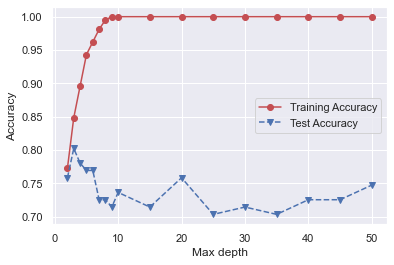

In [186]:
# Decision Tree analysis with the depth

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

In [187]:
# create a model 
dt2 = DecisionTreeClassifier(max_depth = 3, random_state=1)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [188]:
Y_predt1=dt2.predict(X_test)

In [189]:
from sklearn.metrics import accuracy_score

In [190]:
ac_dt2=accuracy_score(y_test,Y_predt1)

In [191]:
ac_dt2

0.8021978021978022

# KNN

In [192]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [193]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [194]:
Y_pred_knn=knn.predict(X_test)

In [195]:
ac_knn1=accuracy_score(y_test,Y_pred_knn)

In [196]:
ac_knn1

0.8461538461538461

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.7802197802197802 , Difference =  21.978021978021978 %
K =  5 , Training Accuracy =  0.8578199052132701  Test Accuracy =  0.8461538461538461 , Difference =  1.1666059059423972 %
K =  10 , Training Accuracy =  0.8293838862559242  Test Accuracy =  0.7802197802197802 , Difference =  4.916410603614397 %
K =  15 , Training Accuracy =  0.8246445497630331  Test Accuracy =  0.7802197802197802 , Difference =  4.442476954325292 %
K =  20 , Training Accuracy =  0.8151658767772512  Test Accuracy =  0.7692307692307693 , Difference =  4.5935107546481895 %
K =  25 , Training Accuracy =  0.7914691943127962  Test Accuracy =  0.7582417582417582 , Difference =  3.3227436071037952 %
K =  30 , Training Accuracy =  0.8056872037914692  Test Accuracy =  0.7692307692307693 , Difference =  3.6456434560699913 %
K =  60 , Training Accuracy =  0.8009478672985783  Test Accuracy =  0.7692307692307693 , Difference =  3.171709806780898 %
K =  100 , Training Accuracy

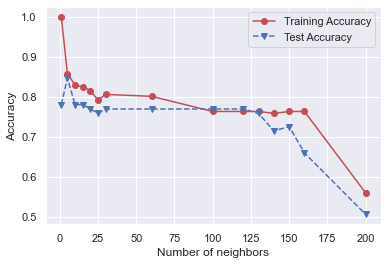

In [197]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30,60,100,120,130,140,150,160,200]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.7912087912087912 , Difference =  20.879120879120883 %
K =  5 , Training Accuracy =  0.8815165876777251  Test Accuracy =  0.8461538461538461 , Difference =  3.536274152387897 %
K =  10 , Training Accuracy =  0.8767772511848341  Test Accuracy =  0.8461538461538461 , Difference =  3.0623405030987927 %
K =  15 , Training Accuracy =  0.8578199052132701  Test Accuracy =  0.8241758241758241 , Difference =  3.3644081037445983 %
K =  20 , Training Accuracy =  0.8530805687203792  Test Accuracy =  0.8021978021978022 , Difference =  5.088276652257695 %
K =  25 , Training Accuracy =  0.8388625592417062  Test Accuracy =  0.7912087912087912 , Difference =  4.765376803291499 %
K =  30 , Training Accuracy =  0.8341232227488151  Test Accuracy =  0.7912087912087912 , Difference =  4.291443154002394 %
K =  40 , Training Accuracy =  0.8246445497630331  Test Accuracy =  0.7692307692307693 , Difference =  5.541378053226387 %
K =  50 , Training Accuracy = 

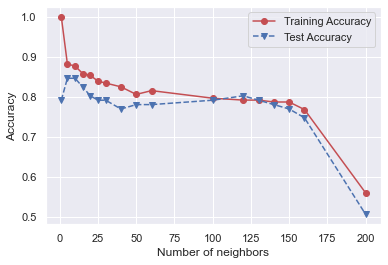

In [198]:
# KNN with Manhatten Distance Metric
numNeighbors = [1, 5, 10, 15, 20, 25, 30,40,50,60,100,120,130,140,150,160,200]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [199]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()
ac_lr1 = accuracy_score(y_pred_test, y_test)

clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Logistic Regression with no regularization
Train Accuracy:  0.8625592417061612
Test Accuracy:  0.8241758241758241

Logistic Regression with L2 regularization
Train Accuracy:  0.8578199052132701
Test Accuracy:  0.8131868131868132


In [200]:
ac_lr1

0.8241758241758241

# Random Forest

In [201]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [202]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [203]:
Y_pred_rf=rf.predict(X_test)

In [204]:
ac_rf1=accuracy_score(y_test,Y_pred_rf)

In [205]:
ac_rf1

0.8131868131868132

In [206]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.7914691943127962
Test Accuracy:  0.7142857142857143


In [207]:
ac_perceptron1 = accuracy_score(y_pred_test, y_test)

In [208]:
ac_perceptron1

0.7142857142857143

In [209]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.8009478672985783
Test Accuracy:  0.8021978021978022


In [210]:
ac_naive1 = accuracy_score(y_pred_test, y_test)

In [211]:
ac_naive1

0.8021978021978022

In [212]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))


Train Accuracy:  0.8436018957345972
Test Accuracy:  0.8241758241758241


In [213]:
# for the SVC classifier
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[32 13]
 [ 3 43]]

Classification Report
              precision    recall  f1-score   support

           0      0.914     0.711     0.800        45
           1      0.768     0.935     0.843        46

    accuracy                          0.824        91
   macro avg      0.841     0.823     0.822        91
weighted avg      0.840     0.824     0.822        91



In [214]:
ac_svc1 = accuracy_score(y_pred_test, y_test)

In [215]:
ac_svc1

0.8241758241758241

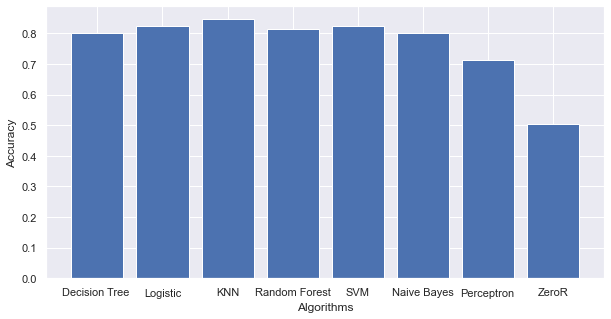

In [216]:
plt.figure(figsize = (10,5))
plt.bar(['Decision Tree ','Logistic','KNN','Random Forest','SVM','Naive Bayes','Perceptron','ZeroR'],[ac_dt2,ac_lr1,ac_knn1,ac_rf1,ac_svc1,ac_naive1,ac_perceptron1,ac_zero1])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

# Hyper Parameter Optimization

# DT HPT

In [217]:
#Manual

In [218]:
dt=DecisionTreeClassifier(max_depth=3,criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

In [219]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100
accuracy_dt

80.21978021978022

In [220]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.848
Accuracy on test set: 0.802


In [221]:
accuracy_score(prediction,y_test)

0.8021978021978022

In [222]:
#now let's try to do hyperparameter

In [223]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [224]:
#let's try with Randomized Search Cv

In [225]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
splitter = ["best", "random"]
# Create the random grid
random_grid = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [226]:
rf=DecisionTreeClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 112, 223, 334, 445,
                                                      556, 667, 778, 889,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [227]:
rf_randomcv.best_params_

{'splitter': 'random',
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 556,
 'criterion': 'entropy'}

In [228]:
rf_randomcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=556, max_features='log2',
                       min_samples_leaf=4, min_samples_split=10,
                       splitter='random')

In [229]:
best_random_grid=rf_randomcv.best_estimator_

In [230]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)

print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))


Accuracy Score 0.7252747252747253


In [231]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [232]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[32 13]
 [12 34]]
0.7252747252747253
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        45
           1       0.72      0.74      0.73        46

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.73      0.73      0.73        91



In [233]:
#GridSearch CV 

In [234]:
rf_randomcv.best_params_

{'splitter': 'random',
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 556,
 'criterion': 'entropy'}

In [235]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] + 2,
                          rf_randomcv.best_params_['min_samples_split'] + 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] + 3,
                          rf_randomcv.best_params_['min_samples_split'] + 4],
    'splitter': [rf_randomcv.best_params_['splitter']]}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [556], 'max_features': ['log2'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [12, 11, 10, 13, 14], 'splitter': ['random']}


In [236]:
rf2=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=rf2,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [556],
                         'max_features': ['log2'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [12, 11, 10, 13, 14],
                         'splitter': ['random']},
             verbose=2)

In [237]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=556, max_features='log2',
                       min_samples_leaf=4, min_samples_split=11,
                       splitter='random')

In [238]:
best_grid=grid_search.best_estimator_

In [239]:
best_grid

DecisionTreeClassifier(criterion='entropy', max_depth=556, max_features='log2',
                       min_samples_leaf=4, min_samples_split=11,
                       splitter='random')

In [240]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[34 11]
 [12 34]]
Accuracy Score 0.7472527472527473
Classification report:               precision    recall  f1-score   support

           0       0.74      0.76      0.75        45
           1       0.76      0.74      0.75        46

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



# KNN HPT

In [241]:
#Manual

In [242]:
knn=KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

In [243]:
pred1=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,pred1)*100
accuracy_knn

84.61538461538461

In [244]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.877
Accuracy on test set: 0.846


In [245]:
accuracy_score(pred1,y_test)

0.8461538461538461

In [246]:
#now let's try to do hyperparameter

In [247]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [248]:
#let's try with Randomized Search Cv

In [249]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_neighbors = range(1, 200)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# Create the random grid
random_grid1 = {'n_neighbors': n_neighbors,
               'weights': weights,
               'metric': metric
               }
print(random_grid1)

{'n_neighbors': range(1, 200), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}


In [250]:
rf3=KNeighborsClassifier()
rf3_randomcv=RandomizedSearchCV(estimator=rf3,param_distributions=random_grid1,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf3_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': range(1, 200),
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [251]:
rf3_randomcv.best_params_

{'weights': 'distance', 'n_neighbors': 8, 'metric': 'manhattan'}

In [252]:
rf3_randomcv.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')

In [253]:
best_random_grid1=rf3_randomcv.best_estimator_

In [254]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid1.predict(X_test)

print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))


Accuracy Score 0.8241758241758241


In [255]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [256]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[34 11]
 [ 5 41]]
0.8241758241758241
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        45
           1       0.79      0.89      0.84        46

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [257]:
#GridSearch CV 

In [258]:
rf3_randomcv.best_params_

{'weights': 'distance', 'n_neighbors': 8, 'metric': 'manhattan'}

In [259]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'weights': [rf3_randomcv.best_params_['weights']],
    
    'n_neighbors': [rf3_randomcv.best_params_['n_neighbors'], 
                         rf3_randomcv.best_params_['n_neighbors']+2, 
                         rf3_randomcv.best_params_['n_neighbors'] + 4,
                   rf3_randomcv.best_params_['n_neighbors']-2, 
                         rf3_randomcv.best_params_['n_neighbors'] - 4],
    'metric': [rf3_randomcv.best_params_['metric']]}

print(param_grid)

{'weights': ['distance'], 'n_neighbors': [8, 10, 12, 6, 4], 'metric': ['manhattan']}


In [260]:
rf4=KNeighborsClassifier()
grid_search=GridSearchCV(estimator=rf4,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan'],
                         'n_neighbors': [8, 10, 12, 6, 4],
                         'weights': ['distance']},
             verbose=2)

In [261]:
grid_search.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=12, weights='distance')

In [262]:
best_grid1=grid_search.best_estimator_

In [263]:
best_grid1

KNeighborsClassifier(metric='manhattan', n_neighbors=12, weights='distance')

In [264]:
y_pred4=best_grid1.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred4)))
print("Classification report: {}".format(classification_report(y_test,y_pred4)))

[[35 10]
 [ 6 40]]
Accuracy Score 0.8241758241758241
Classification report:               precision    recall  f1-score   support

           0       0.85      0.78      0.81        45
           1       0.80      0.87      0.83        46

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



# Logistic regression

In [265]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf6 = LogisticRegression(penalty = 'none')

clf6.fit(X_train, y_train)
y_pred_train = clf6.predict(X_train)
y_pred_test = clf6.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()



Logistic Regression with no regularization
Train Accuracy:  0.8625592417061612
Test Accuracy:  0.8241758241758241



In [266]:
clf6.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [267]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.835354 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.819841 (0.087352) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.819841 (0.087352) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.821356 (0.087703) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.815007 (0.091687) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.815007 (0.091687) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.821356 (0.085962) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.827561 (0.079516) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.827561 (0.079516) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.835354 (0.079735) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.815007 (0.069126) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.815007 (0.069126) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.826190 (0.085486) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.674459 (0.068369) wit

In [268]:
grid_y_predicted = grid_result.predict(X_test)

In [269]:
grid_y_predicted

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0], dtype=int64)

In [270]:
logis_grid_score=accuracy_score(y_test, grid_y_predicted)

In [271]:
logis_grid_score

0.8131868131868132

In [272]:
confusion_matrix(y_test, grid_y_predicted)

array([[33, 12],
       [ 5, 41]], dtype=int64)

In [273]:
print(classification_report(y_test,grid_y_predicted))

              precision    recall  f1-score   support

           0       0.87      0.73      0.80        45
           1       0.77      0.89      0.83        46

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



Accuracy did not improve much after hyper parameter tuning 

# With Stratified Train Test split

In [274]:
from sklearn import metrics

# With train-test split

# ZeroR classifier

In [275]:
# ZeroR classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X1_train, y1_train)
y_pred_train = clf.predict(X1_train)
y_pred_test = clf.predict(X1_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))

Train Accuracy:  0.5450236966824644
Test Accuracy:  0.5384615384615384


In [276]:
ac_zero2 = accuracy_score(y_pred_test, y1_test)

In [277]:
ac_zero2

0.5384615384615384

In [278]:
#As there is class imbalance issue,we need classification report as well

In [279]:
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y1_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y1_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[ 0 42]
 [ 0 49]]

Classification Report
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        42
           1      0.538     1.000     0.700        49

    accuracy                          0.538        91
   macro avg      0.269     0.500     0.350        91
weighted avg      0.290     0.538     0.377        91



# Decision Tree

In [280]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [281]:
dt.fit(X1_train, y1_train)

DecisionTreeClassifier()

In [282]:
Y_pred=dt.predict(X1_test)

In [283]:
from sklearn.metrics import accuracy_score

In [284]:
ac_dt4=accuracy_score(y1_test,Y_pred)

In [285]:
ac_dt4

0.7582417582417582

Depth =  2 , Training Accuracy =  0.7772511848341233 , Test Accuracy =  0.6703296703296703 , Diff =  10.692151450445298  %
Depth =  3 , Training Accuracy =  0.8530805687203792 , Test Accuracy =  0.7142857142857143 , Diff =  13.87948544346649  %
Depth =  4 , Training Accuracy =  0.9004739336492891 , Test Accuracy =  0.7362637362637363 , Diff =  16.421019738555277  %
Depth =  5 , Training Accuracy =  0.933649289099526 , Test Accuracy =  0.7582417582417582 , Diff =  17.540753085776785  %
Depth =  6 , Training Accuracy =  0.985781990521327 , Test Accuracy =  0.7472527472527473 , Diff =  23.852924326857973  %
Depth =  7 , Training Accuracy =  1.0 , Test Accuracy =  0.7802197802197802 , Diff =  21.978021978021978  %
Depth =  8 , Training Accuracy =  1.0 , Test Accuracy =  0.7692307692307693 , Diff =  23.076923076923073  %
Depth =  9 , Training Accuracy =  1.0 , Test Accuracy =  0.7692307692307693 , Diff =  23.076923076923073  %
Depth =  10 , Training Accuracy =  1.0 , Test Accuracy =  0.7472

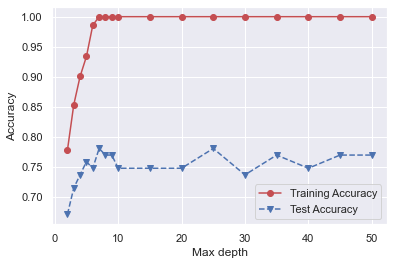

In [286]:
# Decision Tree analysis with the depth

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X1_train, y1_train)
    y_predTrain = clf.predict(X1_train)
    y_predTest = clf.predict(X1_test)
    trainAcc[index] = accuracy_score(y1_train, y_predTrain)
    testAcc[index] = accuracy_score(y1_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

In [287]:
# create a model 
dt5 = DecisionTreeClassifier(max_depth = 2, random_state=1)
dt5.fit(X1_train, y1_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [288]:
Y_predt1=dt5.predict(X1_test)

In [289]:
from sklearn.metrics import accuracy_score

In [290]:
ac_dt2=accuracy_score(y1_test,Y_predt1)

In [291]:
ac_dt2

0.6703296703296703

# KNN

In [292]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [293]:
knn.fit(X1_train, y1_train)

KNeighborsClassifier()

In [294]:
Y_pred_knn=knn.predict(X1_test)

In [295]:
ac_knn1=accuracy_score(y1_test,Y_pred_knn)

In [296]:
ac_knn1

0.8021978021978022

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.7472527472527473 , Difference =  25.274725274725274 %
K =  5 , Training Accuracy =  0.8720379146919431  Test Accuracy =  0.8021978021978022 , Difference =  6.98401124941409 %
K =  10 , Training Accuracy =  0.8199052132701422  Test Accuracy =  0.7692307692307693 , Difference =  5.0674444039372935 %
K =  15 , Training Accuracy =  0.8056872037914692  Test Accuracy =  0.8131868131868132 , Difference =  0.7499609395343998 %
K =  20 , Training Accuracy =  0.8056872037914692  Test Accuracy =  0.8461538461538461 , Difference =  4.046664236237696 %
K =  25 , Training Accuracy =  0.7914691943127962  Test Accuracy =  0.8131868131868132 , Difference =  2.171761887401702 %
K =  30 , Training Accuracy =  0.7867298578199052  Test Accuracy =  0.8241758241758241 , Difference =  3.7445966355918903 %
K =  60 , Training Accuracy =  0.7772511848341233  Test Accuracy =  0.8131868131868132 , Difference =  3.593562835268993 %
K =  100 , Training Accuracy =

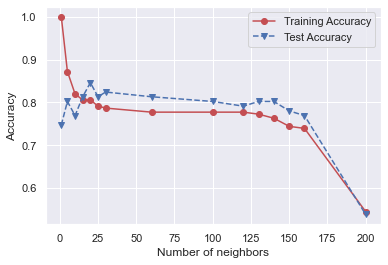

In [297]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30,60,100,120,130,140,150,160,200]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X1_train, y1_train)
    y_predTrain = clf.predict(X1_train)
    y_predTest = clf.predict(X1_test)
    trainAcc.append(accuracy_score(y1_train, y_predTrain))
    testAcc.append(accuracy_score(y1_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.7472527472527473 , Difference =  25.274725274725274 %
K =  5 , Training Accuracy =  0.9146919431279621  Test Accuracy =  0.7912087912087912 , Difference =  12.348315191917091 %
K =  10 , Training Accuracy =  0.8815165876777251  Test Accuracy =  0.8241758241758241 , Difference =  5.734076350190098 %
K =  15 , Training Accuracy =  0.8388625592417062  Test Accuracy =  0.8351648351648352 , Difference =  0.36977240768709674 %
K =  20 , Training Accuracy =  0.8246445497630331  Test Accuracy =  0.8351648351648352 , Difference =  1.0520285401802054 %
K =  25 , Training Accuracy =  0.8151658767772512  Test Accuracy =  0.8461538461538461 , Difference =  3.098796937659498 %
K =  30 , Training Accuracy =  0.8104265402843602  Test Accuracy =  0.8571428571428571 , Difference =  4.671631685849686 %
K =  40 , Training Accuracy =  0.8151658767772512  Test Accuracy =  0.8571428571428571 , Difference =  4.197698036560594 %
K =  50 , Training Accuracy 

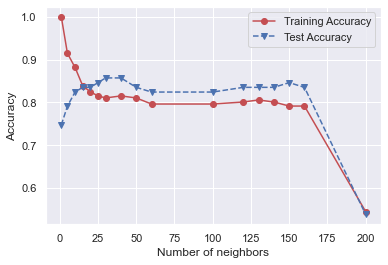

In [298]:
# KNN with Manhatten Distance Metric
numNeighbors = [1, 5, 10, 15, 20, 25, 30,40,50,60,100,120,130,140,150,160,200]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X1_train, y1_train)
    y_predTrain = clf.predict(X1_train)
    y_predTest = clf.predict(X1_test)
    trainAcc.append(accuracy_score(y1_train, y_predTrain))
    testAcc.append(accuracy_score(y1_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [299]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(penalty = 'none')

lr2.fit(X1_train, y1_train)
y_pred_train = lr2.predict(X1_train)
y_pred_test = lr2.predict(X1_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))
print()
ac_lr1 = accuracy_score(y_pred_test, y1_test)

lr3 = LogisticRegression(penalty = 'l2')

lr3.fit(X1_train, y1_train)
y_pred_train = lr3.predict(X1_train)
y_pred_test = lr3.predict(X1_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))

Logistic Regression with no regularization
Train Accuracy:  0.8293838862559242
Test Accuracy:  0.8681318681318682

Logistic Regression with L2 regularization
Train Accuracy:  0.8151658767772512
Test Accuracy:  0.8791208791208791


In [300]:
ac_lr1

0.8681318681318682

# Random Forest

In [301]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [302]:
rf.fit(X1_train,y1_train)

RandomForestClassifier()

In [303]:
Y_pred_rf=rf.predict(X1_test)

In [304]:
ac_rf1=accuracy_score(y1_test,Y_pred_rf)

In [305]:
ac_rf1

0.8131868131868132

In [306]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X1_train, y1_train)
y_pred_train = clf.predict(X1_train)
y_pred_test = clf.predict(X1_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))

Train Accuracy:  0.7582938388625592
Test Accuracy:  0.8241758241758241


In [307]:
ac_perceptron1 = accuracy_score(y_pred_test, y1_test)

In [308]:
ac_perceptron1

0.8241758241758241

In [309]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X1_train, y1_train)
y_pred_train = clf.predict(X1_train)
y_pred_test = clf.predict(X1_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))

Train Accuracy:  0.7867298578199052
Test Accuracy:  0.7802197802197802


In [310]:
ac_naive1 = accuracy_score(y_pred_test, y1_test)

In [311]:
ac_naive1

0.7802197802197802

In [312]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X1_train, y1_train)
y_pred_train = clf.predict(X1_train)
y_pred_test = clf.predict(X1_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))


Train Accuracy:  0.8199052132701422
Test Accuracy:  0.8461538461538461


In [313]:
# for the SVC classifier
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y1_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y1_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[31 11]
 [ 3 46]]

Classification Report
              precision    recall  f1-score   support

           0      0.912     0.738     0.816        42
           1      0.807     0.939     0.868        49

    accuracy                          0.846        91
   macro avg      0.859     0.838     0.842        91
weighted avg      0.855     0.846     0.844        91



In [314]:
ac_svc1 = accuracy_score(y_pred_test, y1_test)

In [315]:
ac_svc1

0.8461538461538461

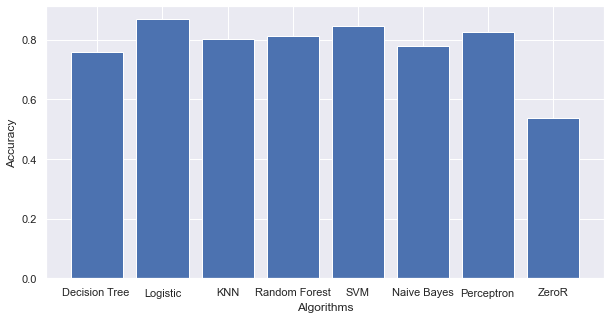

In [317]:
plt.figure(figsize = (10,5))
plt.bar(['Decision Tree ','Logistic','KNN','Random Forest','SVM','Naive Bayes','Perceptron','ZeroR'],[ac_dt4,ac_lr1,ac_knn1,ac_rf1,ac_svc1,ac_naive1,ac_perceptron1,ac_zero2])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

# Hyper Parameter Optimization

# DT HPT

In [318]:
#Manual

In [319]:
dt=DecisionTreeClassifier(max_depth=2,criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X1_train,y1_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=10)

In [320]:
prediction=dt.predict(X1_test)
accuracy_dt=accuracy_score(y1_test,prediction)*100
accuracy_dt

67.03296703296702

In [321]:
print("Accuracy on training set: {:.3f}".format(dt.score(X1_train, y1_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X1_test, y1_test)))

Accuracy on training set: 0.777
Accuracy on test set: 0.670


In [322]:
accuracy_score(prediction,y1_test)

0.6703296703296703

In [323]:
#now let's try to do hyperparameter

In [324]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [325]:
#let's try with Randomized Search Cv

In [326]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
splitter = ["best", "random"]
# Create the random grid
random_grid = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [327]:
rf=DecisionTreeClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X1_train,y1_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 112, 223, 334, 445,
                                                      556, 667, 778, 889,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [328]:
rf_randomcv.best_params_

{'splitter': 'random',
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 112,
 'criterion': 'entropy'}

In [329]:
rf_randomcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=112, max_features='auto',
                       min_samples_leaf=4, min_samples_split=10,
                       splitter='random')

In [330]:
best_random_grid=rf_randomcv.best_estimator_

In [331]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X1_test)

print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))


Accuracy Score 0.5384615384615384


In [332]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [333]:
print(confusion_matrix(y1_test,y_pred))
print(accuracy_score(y1_test,y_pred))
print(classification_report(y1_test,y_pred))

[[30 12]
 [11 38]]
0.7472527472527473
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        42
           1       0.76      0.78      0.77        49

    accuracy                           0.75        91
   macro avg       0.75      0.74      0.75        91
weighted avg       0.75      0.75      0.75        91



In [334]:
#GridSearch CV 

In [335]:
rf_randomcv.best_params_

{'splitter': 'random',
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 112,
 'criterion': 'entropy'}

In [336]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] + 2,
                          rf_randomcv.best_params_['min_samples_split'] + 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] + 3,
                          rf_randomcv.best_params_['min_samples_split'] + 4],
    'splitter': [rf_randomcv.best_params_['splitter']]}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [112], 'max_features': ['auto'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [12, 11, 10, 13, 14], 'splitter': ['random']}


In [337]:
rf2=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=rf2,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X1_train,y1_train)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [112],
                         'max_features': ['auto'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [12, 11, 10, 13, 14],
                         'splitter': ['random']},
             verbose=2)

In [338]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=112, max_features='auto',
                       min_samples_leaf=6, min_samples_split=11,
                       splitter='random')

In [339]:
best_grid=grid_search.best_estimator_

In [340]:
best_grid

DecisionTreeClassifier(criterion='entropy', max_depth=112, max_features='auto',
                       min_samples_leaf=6, min_samples_split=11,
                       splitter='random')

In [341]:
y_pred=best_grid.predict(X1_test)
print(confusion_matrix(y1_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y1_test,y_pred)))
print("Classification report: {}".format(classification_report(y1_test,y_pred)))

[[37  5]
 [ 8 41]]
Accuracy Score 0.8571428571428571
Classification report:               precision    recall  f1-score   support

           0       0.82      0.88      0.85        42
           1       0.89      0.84      0.86        49

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



# KNN HPT

In [342]:
#Manual

In [343]:
knn=KNeighborsClassifier(n_neighbors=100, metric='minkowski', p=1)
knn.fit(X1_train,y1_train)

KNeighborsClassifier(n_neighbors=100, p=1)

In [344]:
pred1=knn.predict(X1_test)
accuracy_knn=accuracy_score(y1_test,pred1)*100
accuracy_knn

82.41758241758241

In [345]:
print("Accuracy on training set: {:.3f}".format(knn.score(X1_train, y1_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X1_test, y1_test)))

Accuracy on training set: 0.796
Accuracy on test set: 0.824


In [346]:
accuracy_score(pred1,y1_test)

0.8241758241758241

In [347]:
#now let's try to do hyperparameter

In [348]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [349]:
#let's try with Randomized Search Cv

In [350]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_neighbors = range(1, 200)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# Create the random grid
random_grid1 = {'n_neighbors': n_neighbors,
               'weights': weights,
               'metric': metric
               }
print(random_grid1)

{'n_neighbors': range(1, 200), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}


In [351]:
rf3=KNeighborsClassifier()
rf3_randomcv=RandomizedSearchCV(estimator=rf3,param_distributions=random_grid1,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf3_randomcv.fit(X1_train,y1_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': range(1, 200),
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [352]:
rf3_randomcv.best_params_

{'weights': 'distance', 'n_neighbors': 8, 'metric': 'manhattan'}

In [353]:
rf3_randomcv.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')

In [354]:
best_random_grid1=rf3_randomcv.best_estimator_

In [355]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid1.predict(X1_test)

print("Accuracy Score {}".format(accuracy_score(y1_test,y_pred)))


Accuracy Score 0.8131868131868132


In [356]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [357]:
print(confusion_matrix(y1_test,y_pred))
print(accuracy_score(y1_test,y_pred))
print(classification_report(y1_test,y_pred))

[[34  8]
 [ 9 40]]
0.8131868131868132
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        42
           1       0.83      0.82      0.82        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [358]:
#GridSearch CV 

In [359]:
rf3_randomcv.best_params_

{'weights': 'distance', 'n_neighbors': 8, 'metric': 'manhattan'}

In [360]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'weights': [rf3_randomcv.best_params_['weights']],
    
    'n_neighbors': [rf3_randomcv.best_params_['n_neighbors'], 
                         rf3_randomcv.best_params_['n_neighbors']+2, 
                         rf3_randomcv.best_params_['n_neighbors'] + 4,
                   rf3_randomcv.best_params_['n_neighbors']-2, 
                         rf3_randomcv.best_params_['n_neighbors'] - 4],
    'metric': [rf3_randomcv.best_params_['metric']]}

print(param_grid)

{'weights': ['distance'], 'n_neighbors': [8, 10, 12, 6, 4], 'metric': ['manhattan']}


In [361]:
rf4=KNeighborsClassifier()
grid_search=GridSearchCV(estimator=rf4,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X1_train,y1_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan'],
                         'n_neighbors': [8, 10, 12, 6, 4],
                         'weights': ['distance']},
             verbose=2)

In [362]:
grid_search.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

In [363]:
best_grid1=grid_search.best_estimator_

In [364]:
best_grid1

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

In [365]:
y_pred4=best_grid1.predict(X1_test)
print(confusion_matrix(y_test,y_pred4))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred4)))
print("Classification report: {}".format(classification_report(y_test,y_pred4)))

[[23 22]
 [20 26]]
Accuracy Score 0.5384615384615384
Classification report:               precision    recall  f1-score   support

           0       0.53      0.51      0.52        45
           1       0.54      0.57      0.55        46

    accuracy                           0.54        91
   macro avg       0.54      0.54      0.54        91
weighted avg       0.54      0.54      0.54        91



# Logistic regression

In [366]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf6 = LogisticRegression(penalty = 'none')

clf6.fit(X1_train, y1_train)
y_pred_train = clf6.predict(X1_train)
y_pred_test = clf6.predict(X1_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))
print()



Logistic Regression with no regularization
Train Accuracy:  0.8293838862559242
Test Accuracy:  0.8681318681318682



In [367]:
clf6.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [368]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X1_train, y1_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.797763 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.793074 (0.097565) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.793074 (0.097565) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.793074 (0.094416) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.797763 (0.095542) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.797763 (0.095542) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.793074 (0.091157) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.794517 (0.095840) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.794517 (0.095840) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.785065 (0.093104) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.796176 (0.086764) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.796176 (0.086764) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.786724 (0.096140) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.694877 (0.061887) with

In [369]:
grid_y_predicted = grid_result.predict(X1_test)

In [370]:
grid_y_predicted

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0], dtype=int64)

In [371]:
logis_grid_score=accuracy_score(y1_test, grid_y_predicted)

In [372]:
logis_grid_score

0.8681318681318682

In [373]:
confusion_matrix(y1_test, grid_y_predicted)

array([[34,  8],
       [ 4, 45]], dtype=int64)

In [374]:
print(classification_report(y1_test,grid_y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        42
           1       0.85      0.92      0.88        49

    accuracy                           0.87        91
   macro avg       0.87      0.86      0.87        91
weighted avg       0.87      0.87      0.87        91



Accuracy did not improve much after hyper parameter tuning 